<h1><center><font size="6">Análisis de Mercado Inmobiliario Argentino</font></center></h1>

## Descripción del problema

En la Inmobiliaria X, se busca ayudar a los tasadores a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, se utilizará un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

Se utilizará una base de datos de propiedades en venta, publicado en el portal [Properati](www.properati.com.ar).

# <a id='0'>Contenidos</a>

1. [Pensando como un Data Scientist](#setup1)<br>
2. [Análisis Exploratorio de Datos](#explore)<br>
    2.1 [Análisis Exploratorio de Datos - Primera División](#explore1)<br>
    2.2 [Análisis Exploratorio de Datos - Casas y PH](#explore2)<br>
    2.3 [Análisis Exploratorio de Datos - Restantes](#explore3)<br>
3. [Desafío](#des)<br>
4. [Machine Learning](#ml)<br>
    4.1 [Vecinos Cercanos / Nearest Neighbors](#ml1)<br>
    4.2 [Árboles de decisión / Decision Tree](#ml2)<br>
5. [Conclusiones](#con)<br>


### 1. Pensando como un Data Scientist <a id="setup1"></a>

1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

Considero que inicialmente datos que caractericen un inmueble como ubicación, antigüedad, estrato socioeconómico, metraje, ascensor, parqueadero, número de cuartos, número de baños, cocina integral, estado general del imbueble, políticas del conjunto, zonas verdes, entre otras.
Como estas características definen el valor del inmueble, permiten hacer un modelo de predicción de dichos valores. Y se debe tener acceso a los estos datos o tener una forma de extraer dicha información.

### 2. Análisis Exploratorio de Datos<a id="explore"></a>

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

2. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.

In [1]:
import pandas as pd # procesamiento de datos
import numpy as np # manejar matrices
import matplotlib.pyplot as plt  # graficar datos
import seaborn as sns # graficar datos con estilos y matices

In [2]:
# Acceder al sistema operativo 
import os 
# import sys

* Para cargar la base de datos desde drive en google colab utilice las dos próximas sentencias: 

**Nota: La ventaja de usar Jupyter está en utilizar los saltos mostrados en la tabla de contenido.**

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
# properati = pd.read_csv(os.path.join(os.getcwd(),'gdrive/My Drive/DataSetsAcamica/DS_Proyecto_01_Datos_Properati.csv'))

* Para cargar la base de datos que descargó del [drive](https://drive.google.com/drive/folders/17wxSBYo7_j8Yy29OJPVulYlUeEl3BDWV?usp=sharing) en Jupyter utilice la siguiente sentencia:

Se crea una base de datos llamada `properati` a partir del archivo csv. Y se visualizan las 5 primeras filas de registros.

In [5]:
properati = pd.read_csv(os.path.join(os.getcwd(),'DS_Proyecto_01_Datos_Properati.csv'))

* Después de cargar la base de datos, continúe aquí:

In [6]:
properati.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

Se observan múltiples columnas con registros, que parecen estar completos. Pero aún hay varias incognitas que se resolveran a continuación:

* Se utiliza `.shape` para conocer la cantidad de filas y columnas de la base `properati`.

In [7]:
properati.shape
print(f'Cantidad de filas: {properati.shape[0]}')
print(f'Cantidad de columnas: {properati.shape[1]}')

Cantidad de filas: 146660
Cantidad de columnas: 19


* Se utiliza `.info()` para conocer la cantidad de registros por columna y el tipo de dato que guarda cada columna.

In [8]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

La mayoría de columnas tienen registros tipo objecto (texto o varios carácteres) mientras que las otras tienen valores numéricos. Adicionalmente se observa que varias columnas tienen valores faltantes (# 3,4,10,11,12).

Adicionalmente gracias al [link](https://www.properati.com.ar/data/) mencionado al inicio, se obtiene la siguiente información sobre las columnas:  

1. start_date - Fecha de alta del aviso.
2. end_date - Fecha de baja del aviso.
3. created_on - Fecha de alta de la primera versión del aviso.
4. lat - Latitud.
5. lon - Longitud.
6. l1 - Nivel administrativo 1: país.
7. l2 - Nivel administrativo 2: usualmente provincia.
8. l3 - Nivel administrativo 3: usualmente ciudad.
9. rooms - Cantidad de ambientes (útil en Argentina).
10. bedrooms - Cantidad de dormitorios (útil en el resto de los países).
11. bathrooms - Cantidad de baños.
12. surface_total - Superficie total en m².
13. surface_covered - Superficie cubierta en m².
14. price - Precio publicado en el anuncio.
15. currency - Moneda del precio publicado.
16. title - Título del anuncio.
17. description - Descripción del anuncio.
18. type - Tipo de propiedad (Casa, Departamento, PH).
19. operation - Tipo de operación (Venta, Alquiler).

* Se utiliza `.isna()` y `.sum()` para contar la cantidad de valores faltantes y sumarlos por columna.

In [9]:
properati.isna().sum().sort_values(ascending=False)

surface_covered    21614
surface_total      20527
lon                 9959
lat                 9925
bathrooms           5957
start_date             0
property_type          0
description            0
title                  0
currency               0
price                  0
bedrooms               0
end_date               0
rooms                  0
l3                     0
l2                     0
l1                     0
created_on             0
operation_type         0
dtype: int64

Las columnas qué contienen la superficie en metros cuadrados del inmueble son las que mayor número de registros faltantes tienen. Seguidas de latitud y longitud. Y finalmente, la que define la cantidad de baños.

Es interesante que los registros faltantes se encuentran en columnas numéricas, lo que facilitará la limpieza de los datos. A continuación, se buscará si hay filas duplicadas en la base de datos.

In [10]:
duplicados=properati.duplicated()
duplicados.value_counts()

False    144302
True       2358
dtype: int64

Hay 2358 filas duplicadas que deben ser removidas para que no afecten la visualización de los datos y que no generen *overfitting* en el modelo, es decir, que el modelo se sesgue a unos datos específicos.

In [11]:
properati.drop_duplicates(inplace=True)
properati.shape
print(f'Cantidad de filas: {properati.shape[0]}')

Cantidad de filas: 144302


**Análisis de características numéricas Properati Dataset**

* Utilizando `.describe()` se pueden observar los valores estadísticos de las columnas numéricas.  

In [12]:
properati.describe()

lat            lon          rooms       bedrooms  \
count  134730.000000  134696.000000  144302.000000  144302.000000   
mean      -34.605399     -58.465155       3.083540       1.984997   
std         0.471782       0.489639       1.420667       1.154110   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.628017     -58.504060       2.000000       1.000000   
50%       -34.601009     -58.443270       3.000000       2.000000   
75%       -34.574642     -58.407400       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  138378.000000  124041.000000    122963.000000  1.443020e+05  
mean        1.599178     218.823413       113.379293  2.406946e+05  
std         0.889403    2054.620674       924.548575  3.171541e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.000000        47.000000  1.100000e+05  
50%         1.000000      79.000000        68.000000  1.650000e+05  
75%         2.000000     140.000000       109.000000  2.650000e+05  
max        14.000000  193549.000000    126062.000000  3.243423e+07

Los valores mínimos de superfie total y cubierta/construída son un poco raros, ya que son muy bajos para un apartamento. También se observa que hay apartamentos sin habitaciones pero todas mínimo tienen un baño. Se observarán en detalle los registros de las superficies:

In [13]:
minimo_superficie_total = properati[properati.surface_total==10]
print(minimo_superficie_total.shape)
minimo_superficie_total

(7, 19)


start_date    end_date  created_on        lat        lon         l1  \
37663   2019-09-18  2019-12-04  2019-09-18 -34.648557 -58.613117  Argentina   
40807   2019-05-11  2019-06-08  2019-05-11 -34.403272 -58.654060  Argentina   
73182   2019-03-21  2019-10-18  2019-03-21 -34.677521 -58.488056  Argentina   
75104   2019-09-11  9999-12-31  2019-09-11 -34.567004 -58.523846  Argentina   
107033  2019-10-13  2019-12-24  2019-10-13 -34.643881 -58.696121  Argentina   
132438  2019-10-27  2020-01-31  2019-10-27 -34.568031 -58.453826  Argentina   
143339  2019-07-31  2019-08-14  2019-07-31 -34.403272 -58.654060  Argentina   

                              l2                  l3  rooms  bedrooms  \
37663   Bs.As. G.B.A. Zona Oeste               Morón    2.0       1.0   
40807   Bs.As. G.B.A. Zona Norte               Tigre    4.0       3.0   
73182            Capital Federal        Villa Lugano    2.0       1.0   
75104   Bs.As. G.B.A. Zona Norte  General San Martín    3.0       2.0   
107033  Bs.As. G.B.A. Zona Oeste           Ituzaingó    2.0       1.0   
132438           Capital Federal            Belgrano    3.0       2.0   
143339  Bs.As. G.B.A. Zona Norte               Tigre    4.0       3.0   

        bathrooms  surface_total  surface_covered     price currency  \
37663         1.0           10.0             42.0   69000.0      USD   
40807         2.0           10.0             10.0  270000.0      USD   
73182         1.0           10.0             45.0  220000.0      USD   
75104         1.0           10.0             10.0   68000.0      USD   
107033        NaN           10.0             47.0   55000.0      USD   
132438        1.0           10.0             78.0  160000.0      USD   
143339        2.0           10.0             10.0  270000.0      USD   

                                                    title  \
37663      Departamento Venta en Duplex 2 ambientes Morón   
40807   PROPIEDAD EN VENTA EN PORTEZUELO- HOMES - NORD...   
73182   Venta PH en Villa Lugano Capital Federal Piedr...   
75104          BARBARO VENDE PH EN VILLA MAIPU SAN MARTIN   
107033  Venta P.H. Ituzaingó Norte 2 amb 56,41m2  c/patio   
132438  Venta Belgrano 3-4 ambientes planta baja 87 me...   
143339  GRAN OPORTUNIDAD ! IDEAL PARA INVERSIÓN - HOME...   

                                              description property_type  \
37663   Corredor Responsable: GRACIELA MENAZZI - CMCPD...  Departamento   
40807   MUY LINDA PROPIEDAD EN VENTA EN HOMES PORTEZUE...  Departamento   
73182   PH en Venta, Ph de 2 ambientes al frente con l...            PH   
75104   Barbaro Vende   Tipo Casa de 2 Dormitorios (3 ...            PH   
107033  Corredor Responsable: GUILLERMO TORRY - CPMCLZ...            PH   
132438  Corredor Responsable: Rebeca Stern - C.U.C.I.C...  Departamento   
143339  MUY LINDA PROPIEDAD EN VENTA EN HOMES PORTEZUE...  Departamento   

       operation_type  
37663           Venta  
40807           Venta  
73182           Venta  
75104           Venta  
107033          Venta  
132438          Venta  
143339          Venta

In [14]:
minimo_superficie_cubierta=properati[properati.surface_covered==1]
minimo_superficie_cubierta.shape

(80, 19)

7 propiedades con superficie total de 10 m². 80 propiedades con superficie construída de 1 m². 

**Análisis de características categóricas Properati Data Set**

* Tipo de propiedad

In [15]:
properati.property_type.value_counts()

Departamento       105276
Casa                21443
PH                  14103
Lote                 1308
Oficina               635
Otro                  374
Local comercial       325
Casa de campo         314
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [16]:
plot = sns.countplot(data=properati, x="property_type") 
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de propiedades por tipo de propiedad")
plt.xlabel("Tipos de propiedad")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.ylim(0,5000)
plt.show()

Departamento, PH y Casa, son el top tres de tipos de propiedad en Buenos Aires, el gráfico se configuró hasta una cuenta de máximo 5000 para poder visualizar los otros tipos de propiedades en el gráfico.

In [17]:
tipos = properati.property_type.value_counts().rename_axis('Tipos').reset_index(name='Cantidad')
tipos['Porcentaje'] = tipos.apply(lambda x: x['Cantidad']*100/tipos.Cantidad.sum() , axis=1)
tipos

Tipos  Cantidad  Porcentaje
0     Departamento    105276   72.955330
1             Casa     21443   14.859808
2               PH     14103    9.773253
3             Lote      1308    0.906432
4          Oficina       635    0.440049
5             Otro       374    0.259179
6  Local comercial       325    0.225222
7    Casa de campo       314    0.217599
8         Depósito       265    0.183643
9          Cochera       259    0.179485

Debido a que la mayoria de valores corresponden a los tres tipos de propiedades: Departamento, Casa y Penthouse. Se analizará el dataset en subdivisiones. 

In [18]:
tipos_tres = tipos.drop(list(range(3,10)))
tipos_tres['Porcentaje'] = tipos.apply(lambda x: x['Cantidad']*100/tipos_tres.Cantidad.sum() , axis=1)
tipos_tres

Tipos  Cantidad  Porcentaje
0  Departamento    105276   74.758205
1          Casa     21443   15.227024
2            PH     14103   10.014770

In [19]:
plt.pie(tipos_tres.Cantidad,labels=['Depa','Casa','PH'],autopct='%0.1f%%')
plt.show()

In [20]:
tipos_sin_tres = tipos.drop([0,1,2])
tipos_sin_tres['Porcentaje'] = tipos.apply(lambda x: x['Cantidad']*100/tipos_sin_tres.Cantidad.sum() , axis=1)
tipos_sin_tres

Tipos  Cantidad  Porcentaje
3             Lote      1308   37.586207
4          Oficina       635   18.247126
5             Otro       374   10.747126
6  Local comercial       325    9.339080
7    Casa de campo       314    9.022989
8         Depósito       265    7.614943
9          Cochera       259    7.442529

In [21]:
plt.pie(tipos_sin_tres.Cantidad,labels=['Lote','Oficina','Otro','LC','CC','D','C'],autopct='%0.1f%%')
plt.show()

Al dividirse los datos en dos grupos se logra una mayor relevancia de los valores que no llegaban ni al 1% de los registros totales. 

In [22]:
properati.operation_type.value_counts()

Venta    144302
Name: operation_type, dtype: int64

In [23]:
properati.l1.value_counts()

Argentina    144302
Name: l1, dtype: int64

Todas las propiedades están en estado de venta y son de Argentina. Por lo que podemos prescindir de esta columna.

In [24]:
properati.drop(columns=['l1','operation_type'], inplace=True)
properati.shape

(144302, 17)

<a href="#0"><font size="1">Volver al inicio</font></a>

### 2.1. Análisis Exploratorio de Datos - Primera División <a id="explore1"></a>

In [25]:
properati_1 = properati[(properati.property_type=='Departamento')|(properati.property_type=='Casa')|(properati.property_type=='PH')]
properati_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140822 entries, 0 to 146659
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       140822 non-null  object 
 1   end_date         140822 non-null  object 
 2   created_on       140822 non-null  object 
 3   lat              131580 non-null  float64
 4   lon              131549 non-null  float64
 5   l2               140822 non-null  object 
 6   l3               140822 non-null  object 
 7   rooms            140822 non-null  float64
 8   bedrooms         140822 non-null  float64
 9   bathrooms        136640 non-null  float64
 10  surface_total    122453 non-null  float64
 11  surface_covered  122176 non-null  float64
 12  price            140822 non-null  float64
 13  currency         140822 non-null  object 
 14  title            140822 non-null  object 
 15  description      140822 non-null  object 
 16  property_type    140822 non-null  obje

Al dividir la base de datos en Departamentos, Casas y Penthouses; se obtiene un dataset con 140822 filas y 16 columnas. Con la mayoria de registros no nulos.

In [26]:
properati_1.isna().sum().sort_values(ascending=False)

surface_covered    18646
surface_total      18369
lon                 9273
lat                 9242
bathrooms           4182
start_date             0
description            0
title                  0
currency               0
price                  0
bedrooms               0
end_date               0
rooms                  0
l3                     0
l2                     0
created_on             0
property_type          0
dtype: int64

In [27]:
properati_1.describe()

lat            lon          rooms       bedrooms  \
count  131580.000000  131549.000000  140822.000000  140822.000000   
mean      -34.603750     -58.464543       3.100013       2.001427   
std         0.476675       0.494619       1.397167       1.131659   
min       -35.150806    -180.000000       1.000000       0.000000   
25%       -34.626924     -58.503287       2.000000       1.000000   
50%       -34.600696     -58.443290       3.000000       2.000000   
75%       -34.574379     -58.408072       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  136640.000000  122453.000000    122176.000000  1.408220e+05  
mean        1.596787     183.745029       112.921359  2.372145e+05  
std         0.885971    1448.697825       926.699295  2.859747e+05  
min         1.000000      10.000000         1.000000  6.000000e+03  
25%         1.000000      52.000000        47.000000  1.120000e+05  
50%         1.000000      78.000000        68.000000  1.650000e+05  
75%         2.000000     138.000000       108.000000  2.637140e+05  
max        14.000000  169000.000000    126062.000000  3.243423e+07

In [28]:
corr=properati_1.corr()
plt.figure(figsize=(7,7))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cbar=True,square=True,annot=True,mask=mask,fmt='.2f',annot_kws={'size':15},
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Hay correlación inversa entre latitud y longitud, y una correlación alta entre rooms - Cantidad de ambientes (útil en Argentina)
y bedrooms - Cantidad de dormitorios (útil en el resto de los países).

In [29]:
plt.figure(figsize=(15,10))
plt.hist(properati_1.surface_total, range=(10,301),edgecolor='black', bins=20)
plt.xlabel('Superficie Total')
plt.ylabel('Frecuencia')
plt.title('Distribución de Superficie Total')
plt.grid(b='white')
plt.show()

**Valores atípicos:**

En estadística un valor atípico (en inglés *outlier*) es una observación que es numéricamente distante del resto de los datos. Las estadísticas derivadas de los conjuntos de datos que incluyen valores atípicos serán frecuentemente engañosas.

Los valores atípicos son en ocasiones una cuestión subjetiva, y existen numerosos métodos para clasificarlos. El método más impartido académicamente por su sencillez y resultados es el test de Tukey, que matematicamente están representados por las siguientes ecuaciones:

`q < Q1 - 1.5 * IQR` o `q > Q3 + 1.5 * IQR`

Donde q es el valor atípico, Q1 es el primer cuartil (25% de los datos), Q3 es el tercer cuartil e IQR es el rango intercuartílico. 

Cuartiles: Valores que dividen los datos en 4 grupos de igual cantidad de datos (Q1,Q2,Q3 y Q4). Son los cuantiles más usados.

Cuantiles: Puntos que dividen al data set en grupos de igual cantidad. Para la base de datos properati_1, 144302 representa al 100% de los datos.

Rango intercuartico: Es la diferencia entre el tercer y el primer cuartil de una distribución. Es una medida de la dispersión estadística. `IQR = Q3 - Q1`

Otro método para determinar los valores atípicos consiste en utilizar *Medcouple* (MC), ya que permite identificar la oblicuidad de una distribución de una variable [Artículo de referencia](https://www.researchgate.net/publication/245023815_Outlier_detection_for_skewed_data).

Sí MC es mayor a 0, se utiliza la siguiente ecuación para determinar los outliers:
`q < Q1 - 1.5 * IQR * exp(-4*MC)` o `q > Q3 + 1.5 * IQR * exp(3*MC)`.
Y sí MC es menor a 0, se utiliza la siguiente ecuación para determinar los outliers:
`q < Q1 - 1.5 * IQR * exp(-3*MC)` o `q > Q3 + 1.5 * IQR * exp(4*MC)`.

In [30]:
from statsmodels.stats.stattools import medcouple
import math

In [31]:
def med(df,column):
        MC=medcouple(np.random.choice(df[column].to_numpy(),size=9999))
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        q_inf=q1-1.5*math.exp(-4*MC)*(q3-q1)
        q_sup=q3+1.5*math.exp(3*MC)*(q3-q1)
        print(f'Columna analizada del Data Frame: {column}')
        print(f'  Cuantil 25 o cuartil 1: {q1}')
        print(f'  Cuantil 75 o cuartil 3: {q3}')
        print(f'Medcouple:\n  Valor límite inferior: {round(q_inf,2)}')
        print(f'  Valor límite superior: {round(q_sup,2)}')
def tukey(df,column):
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        q_inf=q1-1.5*(q3-q1)
        q_sup=q3+1.5*(q3-q1)
        print(f'Columna analizada del Data Frame: {column}')
        print(f'  Cuantil 25 o cuartil 1: {q1}')
        print(f'  Cuantil 75 o cuartil 3: {q3}')
        print(f'Test de Tukey:\n  Valor límite inferior: {round(q_inf,2)}')
        print(f'  Valor límite superior: {round(q_sup,2)}')

In [32]:
med(properati_1,'surface_total')
tukey(properati_1,'surface_total')

Columna analizada del Data Frame: surface_total
  Cuantil 25 o cuartil 1: 52.0
  Cuantil 75 o cuartil 3: 138.0
Medcouple:
  Valor límite inferior: 27.35
  Valor límite superior: 584.39
Columna analizada del Data Frame: surface_total
  Cuantil 25 o cuartil 1: 52.0
  Cuantil 75 o cuartil 3: 138.0
Test de Tukey:
  Valor límite inferior: -77.0
  Valor límite superior: 267.0


Es decir que el 50% de los datos de superficie total se encuentran entre 52 a 138 metros cuadrados para la división que incluye apartamento, casa y PH.

In [33]:
x=np.linspace(0,1,num=51)
y=properati_1.surface_total.quantile(x)

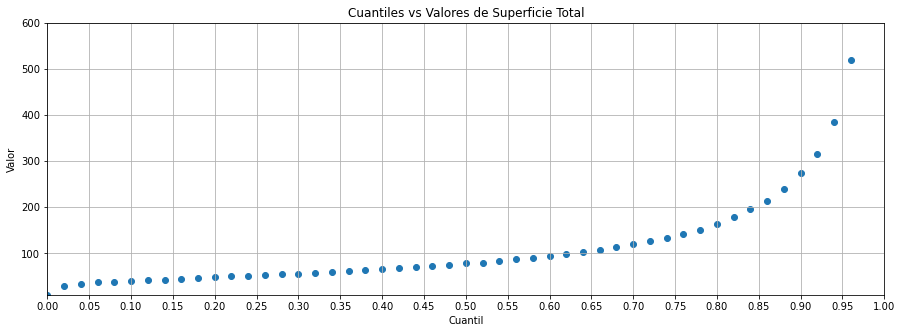

In [34]:
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.xlim((0,0.99))
plt.ylim((10,600))
plt.ylabel('Valor')
plt.xlabel('Cuantil')
plt.title('Cuantiles vs Valores de Superficie Total')
plt.xticks(np.linspace(0,1,num=21))
plt.grid(True)
plt.show()

Utilizando *medcouple*, el límite superior es 554 y se encuentra entre el cuantil 96 y 97, mientras que utilizando el Test de Tukey el límite superior es 267 y está entre el cuantil 89 y 90.

Debido a que los datos representan el metraje de un apartamento, casa o PH se considerará 267 metros cuadrados como el límite superior de los datos para filtrar los valores atípicos.

In [35]:
outliers = properati_1[properati_1.surface_total >= 267]
outliers.shape

(12697, 17)

In [36]:
pOut = 100*outliers.shape[0]/properati_1.start_date.count()
pOut

9.016346877618554

12697 filas equivalentes al 9% de los datos se retirarán del data set. Se considera que no hay valores inferiores atípicos segun el test de Tukey.

In [37]:
outlier = properati_1[(properati_1.surface_total < 25) & (properati_1.surface_covered < 25) & (properati_1.bedrooms>1) & (properati_1.bathrooms>1)]
outlier

start_date    end_date  created_on        lat       lon  \
40807   2019-05-11  2019-06-08  2019-05-11 -34.403272 -58.65406   
143339  2019-07-31  2019-08-14  2019-07-31 -34.403272 -58.65406   

                              l2     l3  rooms  bedrooms  bathrooms  \
40807   Bs.As. G.B.A. Zona Norte  Tigre    4.0       3.0        2.0   
143339  Bs.As. G.B.A. Zona Norte  Tigre    4.0       3.0        2.0   

        surface_total  surface_covered     price currency  \
40807            10.0             10.0  270000.0      USD   
143339           10.0             10.0  270000.0      USD   

                                                    title  \
40807   PROPIEDAD EN VENTA EN PORTEZUELO- HOMES - NORD...   
143339  GRAN OPORTUNIDAD ! IDEAL PARA INVERSIÓN - HOME...   

                                              description property_type  
40807   MUY LINDA PROPIEDAD EN VENTA EN HOMES PORTEZUE...  Departamento  
143339  MUY LINDA PROPIEDAD EN VENTA EN HOMES PORTEZUE...  Departamento

Hay una propiedad con dos registros de menos de 25 m2 con mas de un dormitorio y mas de un baño,  lo que la hace poco creíble. Estos registros se deben borrar. En este caso no afectan significativamente, pero si fueran una cantidad alta de este tipo de registros podría afectar la visualización y el modelo.

Creamos un data set que filtra los valores atipicos de la superficie total (s_tot_1):

In [38]:
s_tot_1 = properati_1[properati_1.surface_total < 267]

Creamos un data set que filtra los valores atipicos de la superficie construida o cubierta (s_cub_1):

In [39]:
tukey(properati_1,'surface_covered')

Columna analizada del Data Frame: surface_covered
  Cuantil 25 o cuartil 1: 47.0
  Cuantil 75 o cuartil 3: 108.0
Test de Tukey:
  Valor límite inferior: -44.5
  Valor límite superior: 199.5


In [40]:
s_cub_1 = properati_1[properati_1.surface_covered < 199.5]

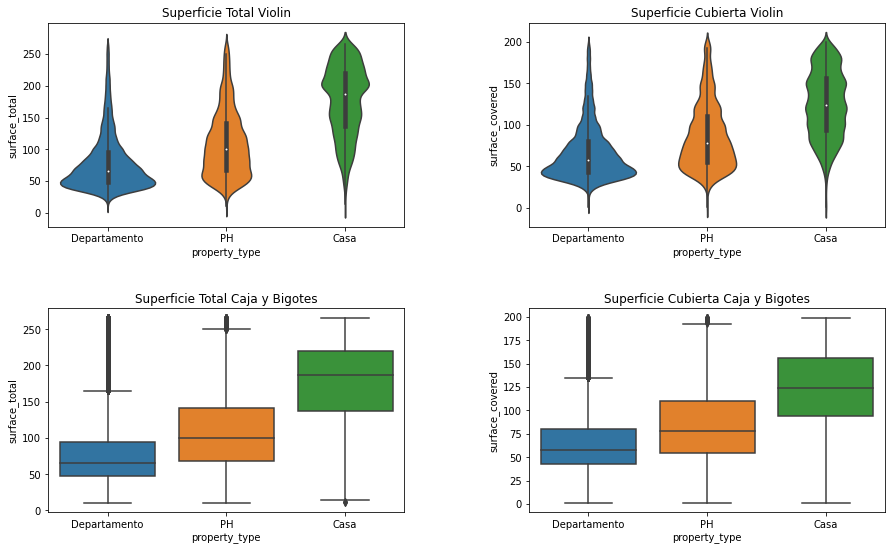

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(data=s_tot_1,x='property_type',y='surface_total')
title = 'Superficie Total Violin'
plt.title(title);
plt.subplot(2,2,2)
sns.violinplot(data=s_cub_1,x='property_type',y='surface_covered')
title = 'Superficie Cubierta Violin'
plt.title(title);
plt.subplot(2,2,3)
sns.boxplot(data=s_tot_1,x='property_type',y='surface_total')
title = 'Superficie Total Caja y Bigotes'
plt.title(title);
plt.subplot(2,2,4)
sns.boxplot(data=s_cub_1,x='property_type',y='surface_covered')
title = 'Superficie Cubierta Caja y Bigotes'
plt.title(title);
plt.subplots_adjust(wspace=0.35,bottom=0.2,hspace=0.4)
plt.show()

La diferencia entre superficie total y superficie contruída de los apartamentos frente a las casa se nota facilmente, y un poco en los penthouses. La distribucion de superficie cubierta frente a superficie total para las casas se nota un poco en los diagramas de violin. Y la distribucion de PH tiene una mayor pendiente en los datos de superficie cubierta.

Debido a la presencia de bastantes valores atipicos mostrados en los diagramas de cajas de los departamentos y a que cerca del 73% de los datos de la base de datos inicial corresponde a departamentos. Se manejaran estos datos por aparte.

* Antes de dividir los datos, se deben transformar las columnas con variables de tipo texto asociadas a fechas para analizar los datos.

In [42]:
properati = properati.copy()
properati['start_date']=pd.to_datetime(properati['start_date'],format='%Y-%m-%d')
properati = properati.copy()
properati['end_date']=np.where(properati['end_date']=='9999-12-31','2030-12-31',properati['end_date'])
properati['end_date']=pd.to_datetime(properati['end_date'],format='%Y-%m-%d')
properati = properati.copy()
properati['created_on']=pd.to_datetime(properati['created_on'],format='%Y-%m-%d')

Se filtran los datos para solo apartamentos.

In [43]:
departamentos = properati[properati.property_type == 'Departamento']
departamentos.reset_index(inplace=True)
departamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105276 entries, 0 to 105275
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   index            105276 non-null  int64         
 1   start_date       105276 non-null  datetime64[ns]
 2   end_date         105276 non-null  datetime64[ns]
 3   created_on       105276 non-null  datetime64[ns]
 4   lat              97784 non-null   float64       
 5   lon              97772 non-null   float64       
 6   l2               105276 non-null  object        
 7   l3               105276 non-null  object        
 8   rooms            105276 non-null  float64       
 9   bedrooms         105276 non-null  float64       
 10  bathrooms        102601 non-null  float64       
 11  surface_total    91908 non-null   float64       
 12  surface_covered  91605 non-null   float64       
 13  price            105276 non-null  float64       
 14  currency         105

In [44]:
departamentos.isna().sum().sort_values(ascending=False)

surface_covered    13671
surface_total      13368
lon                 7504
lat                 7492
bathrooms           2675
index                  0
description            0
title                  0
currency               0
price                  0
bedrooms               0
start_date             0
rooms                  0
l3                     0
l2                     0
created_on             0
end_date               0
property_type          0
dtype: int64

* Si hay un dato faltante en la superficie total se reemplaza por el valor de superficie construída y viceversa. Si falta el valor en ambos se borra.

Transformamos los valores faltantes de superficie a 0, ya que los valores actuales nunca llegan a este valor y se podran manipular de una forma más fácil.

In [45]:
departamentos = departamentos.copy()
departamentos['surface_total']=departamentos['surface_total'].replace(np.nan, 0)

In [46]:
departamentos = departamentos.copy()
departamentos['surface_covered']=departamentos['surface_covered'].replace(np.nan, 0)

In [47]:
def fill(df,c1,c2):
    l_zeros_1=df.index[df[c1] == 0].tolist()
    l_zeros_2=df.index[df[c2] == 0].tolist()
    for j in l_zeros_1:
        if df[c2].loc[j]!=0:
            df.loc[j,c1] = df[c2].loc[j]  
    for j in l_zeros_2:
        if df[c1].loc[j]!=0:
            df.loc[j,c2] = df[c1].loc[j]  

In [48]:
fill(departamentos,'surface_total','surface_covered')

Filtramos los apartamentos cuyos metrajes son desconocidos.

In [49]:
depa=departamentos[(departamentos['surface_total']>0) & (departamentos['surface_covered']>0)]

In [50]:
depa.shape

(92207, 18)

In [51]:
departamentos.shape[0]-depa.shape[0]

13069

Más de 13000 registros no tienen los valores de superficie total ni superficie construída. Por lo tanto fueron removidos. Una forma para no remover estos inmuebles es tratando de complementar el data set con otro data set o utilizar una asignación de metrajes por vecinos cercanos.

* Se crea la columna año (year).

In [52]:
depa=depa.copy()
depa['year']=depa['start_date'].dt.year

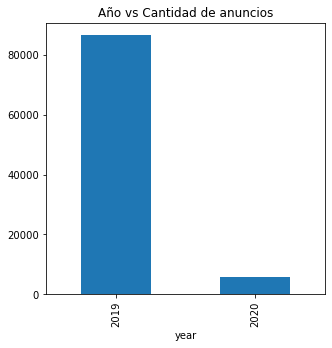

In [53]:
plt.figure(figsize=(4,4))
depa.groupby('year').property_type.count().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.title('Año vs Cantidad de anuncios',fontsize=12)
plt.show()

<a href="#1"><font size="1">Volver a la tabla de contenido del desafío</font></a>

### Desafío Gráfica 1 <a id="des1"></a>

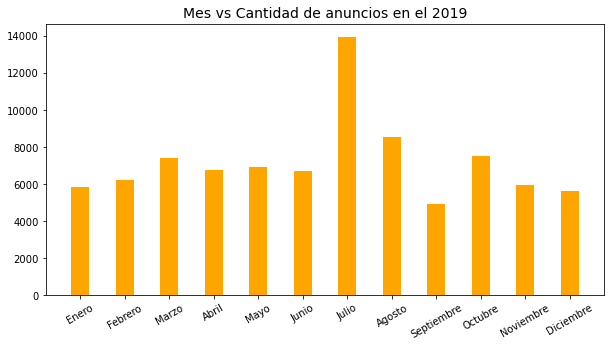

In [54]:
depa_2019=depa[depa.year==2019]
depa_2019=depa_2019.copy()
depa_2019['month']=depa_2019['start_date'].dt.month
plt.figure(figsize = (10,5))
ax = plt.subplot(1,1,1)
x_value=[2*e+0.8*1 for e in range(12)]
plt.bar(x_value,depa_2019.groupby('month').property_type.count(),color='orange')
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
ax.set_xticks(x_value)
ax.set_xticklabels(meses,rotation=30)
plt.title('Mes vs Cantidad de anuncios en el 2019',fontsize=14)
plt.show()

El mes de mayor publicaciones de anuncios para la venta de apartamentos fue en Julio.

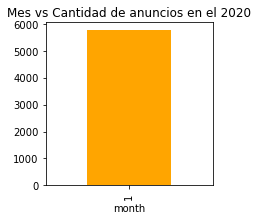

In [55]:
plt.figure(figsize = (4,2))
depa_2020=depa[depa.year==2020]
depa_2020=depa_2020.copy()
depa_2020['month']=depa_2020['start_date'].dt.month
depa_2020.groupby('month').property_type.count().plot(kind='bar', stacked=True, figsize=(3,3),color='orange') 
plt.title('Mes vs Cantidad de anuncios en el 2020',fontsize=12)
plt.show()

La base de datos utilizada no cubre todos los meses del año 2020. La cantidad de anuncios del mes de Enero del 2020 es similar a la del año 2019.

In [56]:
l2 = pd.DataFrame(depa.groupby(["l2"], sort = True)["l2"].count().reset_index(name="Total"))
l2.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
l2['Porcentaje']=l2.apply(lambda x: x['Total']*100/l2.Total.sum(),axis=1)
l2

l2  Total  Porcentaje
0           Capital Federal  69527   75.403169
1  Bs.As. G.B.A. Zona Norte  14140   15.335061
2    Bs.As. G.B.A. Zona Sur   4812    5.218693
3  Bs.As. G.B.A. Zona Oeste   3728    4.043077

El 75% de los departamentos corresponden a la provincia de la Capital Federal.

In [57]:
l3 = pd.DataFrame(depa.groupby(["l3"], sort = True)["l3"].count().reset_index(name="Total"))
l3.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
l3['Porcentaje']=l3.apply(lambda x: x['Total']*100/l3.Total.sum(),axis=1)
l3_10 = l3.drop(list(range(10,89)))
l3_10

l3  Total  Porcentaje
0        Palermo  11096   12.033794
1          Tigre   6841    7.419176
2        Almagro   5954    6.457210
3       Belgrano   5760    6.246814
4       Recoleta   5361    5.814092
5   Villa Crespo   5048    5.474639
6      Caballito   4956    5.374863
7   Barrio Norte   3001    3.254634
8  Villa Urquiza   2397    2.599586
9      Balvanera   2036    2.208075

Más del 10% de los departamentos se ubican en la ciudad de Palermo.

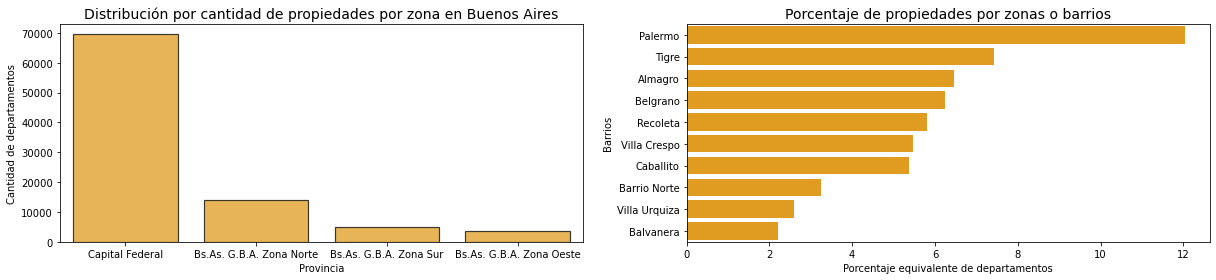

In [58]:
plt.figure(figsize = (17,4))
plt.subplot(1,2,1)
sns.countplot(x="l2", data=depa, alpha = 0.75, edgecolor='black', linewidth=1.2, order=depa["l2"].value_counts().index, color='orange')
plt.title("Distribución por cantidad de propiedades por zona en Buenos Aires",fontsize=14)
plt.xlabel("Provincia",fontsize=10)
plt.ylabel("Cantidad de departamentos",fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x="Porcentaje", y="l3", data=l3_10,color="orange")
plt.title("Porcentaje de propiedades por zonas o barrios",fontsize=14)
plt.ylabel("Barrios",fontsize=10)
plt.xlabel("Porcentaje equivalente de departamentos",fontsize=10)
plt.tight_layout()
plt.show()

Filtramos los datos a la zona Capital Federal

In [59]:
depa_capital=depa[depa.l2=='Capital Federal']

Se eliminan las columnas irrelevantes o que tienen el mismo valor para todo el data set.

In [60]:
depa_capital=depa_capital.copy()
depa_capital.drop(columns=['index','l2','currency','property_type'],inplace=True)

In [61]:
depa_capital.shape

(69527, 15)

In [62]:
depa_capital.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  65641.000000  65641.000000  69527.000000  69527.000000  68799.000000   
mean     -34.596749    -58.431780      2.857235      1.878263      1.526447   
std        0.022446      0.034507      1.197177      0.946514      0.838144   
min      -34.694366    -58.530467      1.000000      0.000000      1.000000   
25%      -34.610355    -58.453537      2.000000      1.000000      1.000000   
50%      -34.597696    -58.430832      3.000000      2.000000      1.000000   
75%      -34.582609    -58.406910      4.000000      3.000000      2.000000   
max      -34.535909    -58.354919     21.000000     15.000000     14.000000   

       surface_total  surface_covered         price          year  
count   69527.000000     69527.000000  6.952700e+04  69527.000000  
mean       98.632603        86.098379  2.658271e+05   2019.063501  
std       663.116489       499.816025  3.473748e+05      0.243863  
min         1.000000         1.000000  6.000000e+03   2019.000000  
25%        47.000000        43.000000  1.200000e+05   2019.000000  
50%        66.000000        60.000000  1.740000e+05   2019.000000  
75%        99.000000        87.000000  2.750000e+05   2019.000000  
max    108960.000000    104890.000000  3.243423e+07   2020.000000

De igual forma que con la base de datos departamentos, realizamos el test de Tukey para filtrar los valores atípicos del data set.

In [63]:
tukey(depa_capital,'surface_total')

Columna analizada del Data Frame: surface_total
  Cuantil 25 o cuartil 1: 47.0
  Cuantil 75 o cuartil 3: 99.0
Test de Tukey:
  Valor límite inferior: -31.0
  Valor límite superior: 177.0


In [64]:
s_tot_2=depa_capital[depa_capital.surface_total<177]

In [65]:
tukey(depa_capital,'surface_covered')

Columna analizada del Data Frame: surface_covered
  Cuantil 25 o cuartil 1: 43.0
  Cuantil 75 o cuartil 3: 87.0
Test de Tukey:
  Valor límite inferior: -23.0
  Valor límite superior: 153.0


In [66]:
s_cub_2=depa_capital[depa_capital.surface_covered<153]

In [67]:
tukey(depa_capital,'price')

Columna analizada del Data Frame: price
  Cuantil 25 o cuartil 1: 120000.0
  Cuantil 75 o cuartil 3: 275000.0
Test de Tukey:
  Valor límite inferior: -112500.0
  Valor límite superior: 507500.0


In [68]:
price_1=depa_capital[depa_capital.price<507500]

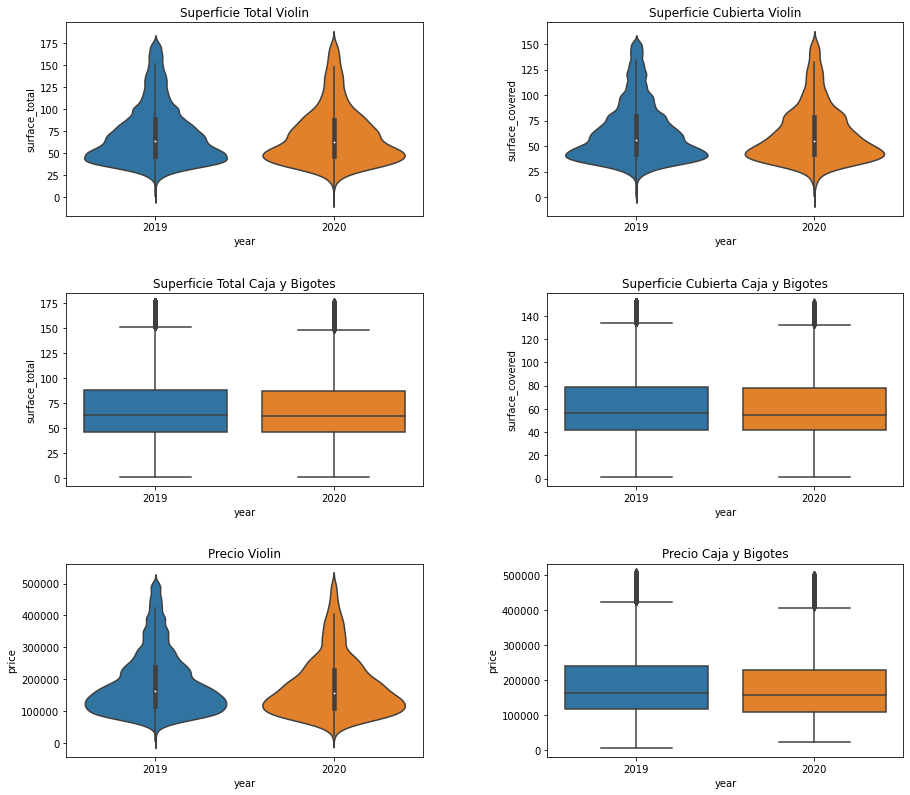

In [69]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.violinplot(data=s_tot_2,x='year',y='surface_total')
title = 'Superficie Total Violin'
plt.title(title);
plt.subplot(3,2,2)
sns.violinplot(data=s_cub_2,x='year',y='surface_covered')
title = 'Superficie Cubierta Violin'
plt.title(title);
plt.subplot(3,2,3)
sns.boxplot(data=s_tot_2,x='year',y='surface_total')
title = 'Superficie Total Caja y Bigotes'
plt.title(title);
plt.subplot(3,2,4)
sns.boxplot(data=s_cub_2,x='year',y='surface_covered')
title = 'Superficie Cubierta Caja y Bigotes'
plt.title(title);
plt.subplot(3,2,5)
sns.violinplot(data=price_1,x='year',y='price')
title = 'Precio Violin'
plt.title(title);
plt.subplot(3,2,6)
sns.boxplot(data=price_1,x='year',y='price')
title = 'Precio Caja y Bigotes'
plt.title(title);
plt.subplots_adjust(wspace=0.35,bottom=0.2,hspace=0.4)
plt.show()

In [70]:
depa_2019.groupby('month').price.mean().mean()

242671.75869404213

In [71]:
depa_2019.groupby('month').price.mean().sort_values(ascending=False)

month
10    277960.826992
7     271930.671731
8     254794.449678
9     243718.224778
5     241855.230481
3     240961.730498
4     237295.582054
11    237253.239105
2     233693.471635
12    227899.881967
6     224104.308883
1     220593.486528
Name: price, dtype: float64

In [72]:
depa_2020.groupby('month').price.mean()

month
1    222641.509368
Name: price, dtype: float64

Los diagramas nos muestran que las distribuciones son oblicuas o asimétricas positivas, es decir que los datos están recogidos hacia la izquierda lo que genera que el valor de la mediana sea menor al promedio. 

Así mismo las distribuciones de metraje no varían significativamente con los años. Mientras que se nota un poco de disminución de los precios del 2019 al 2020. Esto se explica a que los datos del 2020 solo corresponden a Enero, y este mes tiene un precio promedio menor a la media del 2019. 

Adicionalmente, en la tabla agrupada por meses y precios se destacan los meses de Julio a Octubre con precios por encima del promedio. Y el mes de Enero cómo el de menor valor. Faltarían más datos de otros años para saber si la tendencia de los precios de los apartamentos es a ser menores entre Noviembre a Enero y a aumentar entre Julio a Octubre. 

Para analizar las otras variables numéricas se realizan diagramas de Caja y Bigotes.

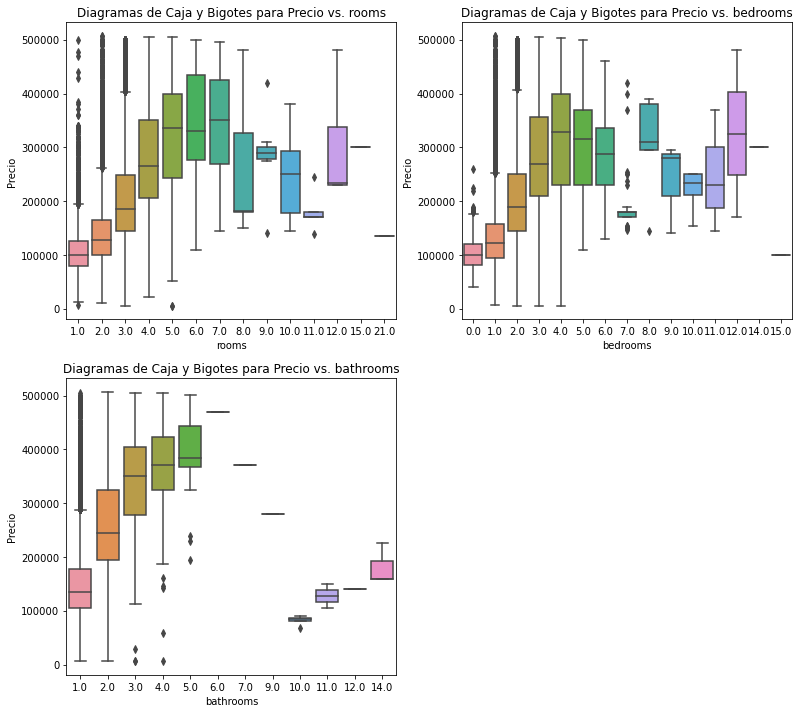

In [73]:
plt.figure(figsize=(13,12))
vars_to_plot=['rooms','bedrooms','bathrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=var,y='price',data=price_1)
    plt.ylabel("Precio")
    plt.title("Diagramas de Caja y Bigotes para Precio vs. " + var)

Se utilizará el test de Tukey para limpiar las visualizaciones de estas tres variables numéricas.

In [74]:
tukey(price_1,'rooms')
tukey(price_1,'bedrooms')
tukey(price_1,'bathrooms')

Columna analizada del Data Frame: rooms
  Cuantil 25 o cuartil 1: 2.0
  Cuantil 75 o cuartil 3: 3.0
Test de Tukey:
  Valor límite inferior: 0.5
  Valor límite superior: 4.5
Columna analizada del Data Frame: bedrooms
  Cuantil 25 o cuartil 1: 1.0
  Cuantil 75 o cuartil 3: 2.0
Test de Tukey:
  Valor límite inferior: -0.5
  Valor límite superior: 3.5
Columna analizada del Data Frame: bathrooms
  Cuantil 25 o cuartil 1: 1.0
  Cuantil 75 o cuartil 3: 2.0
Test de Tukey:
  Valor límite inferior: -0.5
  Valor límite superior: 3.5


In [75]:
rooms_dep=depa_capital[depa_capital.rooms<=5]
bedrooms_dep=depa_capital[depa_capital.bedrooms<=4]
bathrooms_dep=depa_capital[depa_capital.bathrooms<=4]

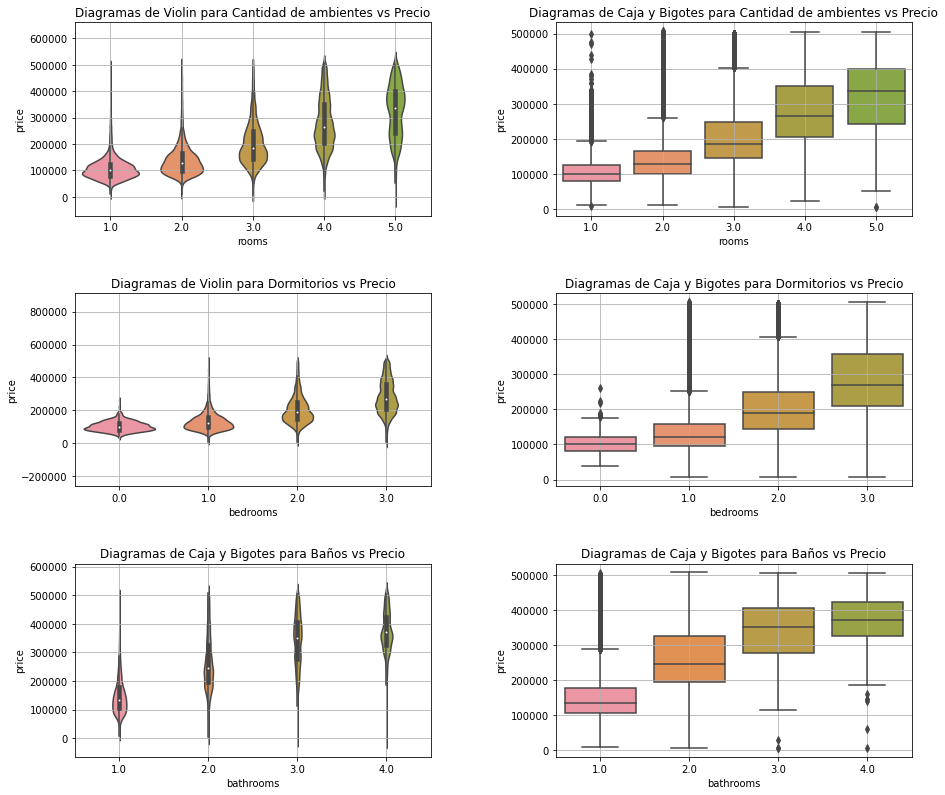

In [76]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.violinplot(data=price_1,y='price',x='rooms')
plt.xlim(-0.5,4.5)
title = 'Diagramas de Violin para Cantidad de ambientes vs Precio'
plt.grid(b='white')
plt.title(title);
plt.subplot(3,2,2)
sns.boxplot(data=price_1,y='price',x='rooms')
plt.xlim(-0.5,4.5)
title = 'Diagramas de Caja y Bigotes para Cantidad de ambientes vs Precio'
plt.grid(b='white')
plt.title(title);
plt.subplot(3,2,3)
sns.violinplot(data=price_1,y='price',x='bedrooms')
plt.xlim(-0.5,3.5)
title = 'Diagramas de Violin para Dormitorios vs Precio'
plt.grid(b='white')
plt.title(title);
plt.subplot(3,2,4)
sns.boxplot(data=price_1,y='price',x='bedrooms')
plt.xlim(-0.5,3.5)
title = 'Diagramas de Caja y Bigotes para Dormitorios vs Precio'
plt.grid(b='white')
plt.title(title);
plt.subplot(3,2,5)
sns.violinplot(data=price_1,y='price',x='bathrooms')
plt.xlim(-0.5,3.5)
title = 'Diagramas de Caja y Bigotes para Baños vs Precio'
plt.grid(b='white')
plt.title(title);
plt.subplot(3,2,6)
sns.boxplot(data=price_1,y='price',x='bathrooms')
plt.xlim(-0.5,3.5)
title = 'Diagramas de Caja y Bigotes para Baños vs Precio'
plt.grid(b='white')
plt.title(title);
plt.subplots_adjust(wspace=0.35,bottom=0.2,hspace=0.4)
plt.show()

En los diagramas de cajas y bigotes anteriores se puede destacar que los llamados ambientes determinan menos el precio que los dormitorios. Y por otra parte la cantidad de baños determina más que estas dos variables el precio del departamento. 

Las formas de los violines y las cajas para las distribuciones de datos de ambientes y dormitorios son muy similares, y pareciera que la variable ambiente es dormitorio más 1. Al analizarlo de esta forma ambientes y dormitorios predicen de manera similar el precio. 

Para dormitorios, gracias al test de Tukey podemos analizar las distribuciones para 4, 5 y 6 dormitorios. Donde los precios promedios mayores corresponden a 4 dormitorios en vez de 5 o 6 como uno supondría.

* Pairplot

In [77]:
price_1=price_1.copy()
price_1['Div']=price_1.apply(lambda row: 'mayor' if row.price>=price_1.price.mean() else 'menor', axis=1)

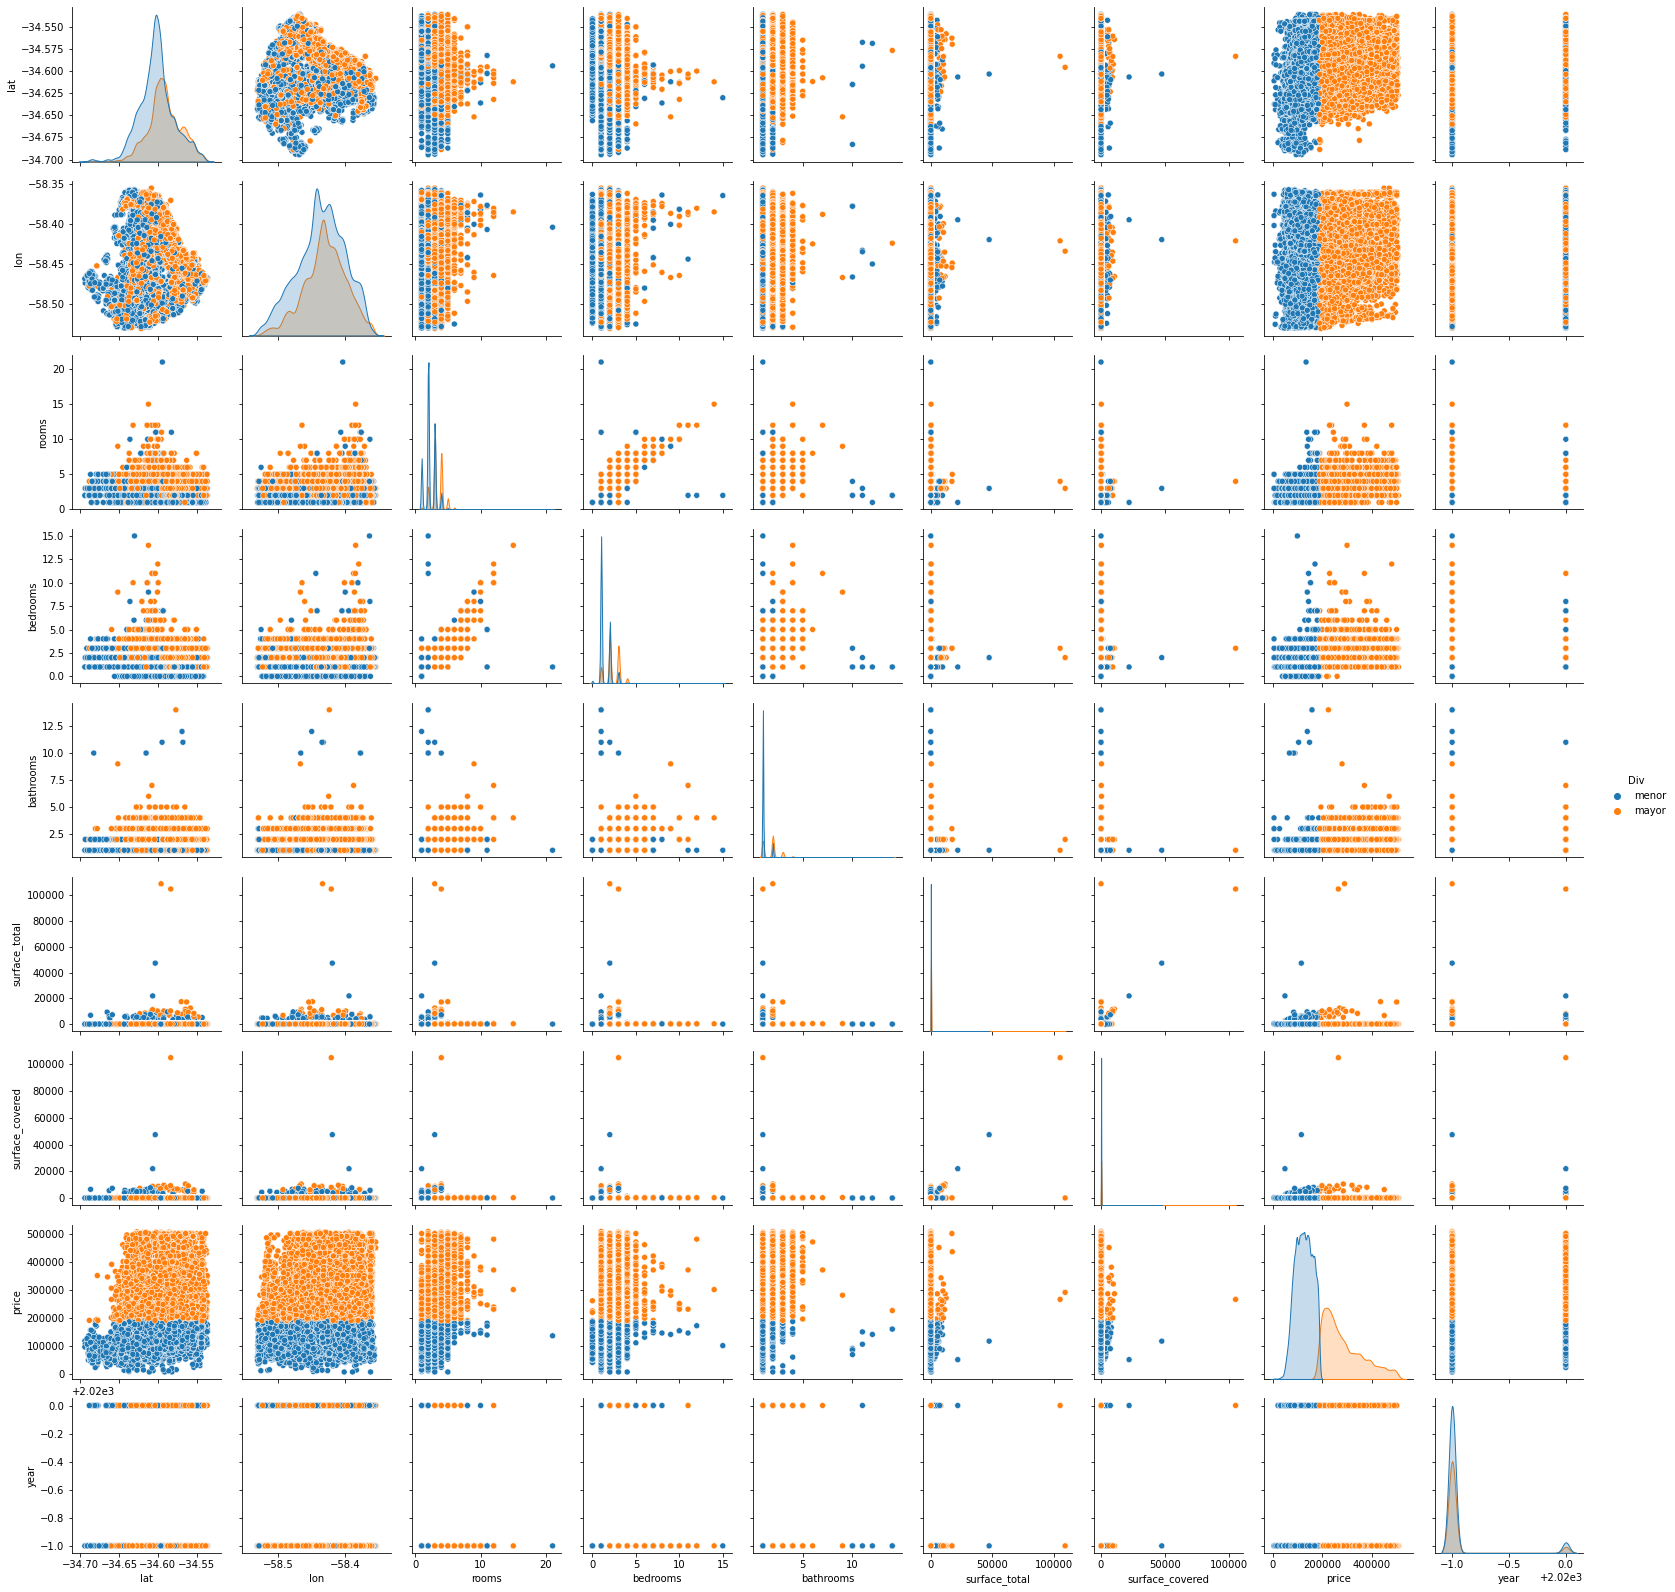

In [78]:
sns.pairplot(price_1,diag_kind='kde',hue='Div')

Al crear la columna Div que divide el data set en precios mayores al promedio y menores al promedio obtenemos información importante, principalmente en las gráfica de latitud/longitud, ya que indica una distinción entre las regiones de menor y mayor precio.

* Correlación 

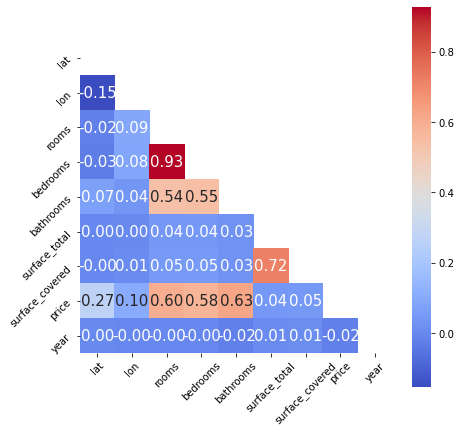

In [79]:
corr1=price_1.corr()
plt.figure(figsize=(7,7))
mask=np.zeros_like(corr1)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr1,cbar=True,square=True,annot=True,mask=mask,fmt='.2f',annot_kws={'size':15},
            xticklabels=corr1.columns,
            yticklabels=corr1.columns,
            cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [80]:
corr1_price = corr1['price']
corr1_price.sort_values(ascending=False)

price              1.000000
bathrooms          0.625021
rooms              0.598888
bedrooms           0.577660
lat                0.269514
lon                0.103538
surface_covered    0.045397
surface_total      0.043960
year              -0.021754
Name: price, dtype: float64

Filtrando por distintas características y métodos (tipo de propiedad/ test de Tukey) se obtuvo una mayor correlación entre ambientes y dormitorios en comparación a la correlación del data set que incluía los tres tipos de propiedades con mayor número de datos (Departamentos,casas y PH). Esta correlación numérica es un representación observada en las visualizaciones que mostraban lo similar que eran las distribuciones de *rooms* y *bedrooms*. 

Adicionalmente las correlaciones de las columnas baños, dormitorios y ambientes son las más significativas para predecir el precio. Pero ya que dos de estas columnas están fuertemente relacionadas, sería necesario prescindir de una de estas para no sobre ajustar el futuro modelo.

In [81]:
price_1.shape

(63171, 16)

El último data set - price_1 se utilizaría para modelar los departamentos, ya que atravesó los pasos de limpieza y EDA.

<a href="#0"><font size="1">Volver al inicio</font></a>

### 2.2. Análisis Exploratorio de Datos - Casas y PH <a id="explore2"></a>

In [82]:
sec_div = properati[(properati.property_type == 'Casa') | (properati.property_type == 'PH')]
sec_div.reset_index(inplace=True)
sec_div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35546 entries, 0 to 35545
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            35546 non-null  int64         
 1   start_date       35546 non-null  datetime64[ns]
 2   end_date         35546 non-null  datetime64[ns]
 3   created_on       35546 non-null  datetime64[ns]
 4   lat              33796 non-null  float64       
 5   lon              33777 non-null  float64       
 6   l2               35546 non-null  object        
 7   l3               35546 non-null  object        
 8   rooms            35546 non-null  float64       
 9   bedrooms         35546 non-null  float64       
 10  bathrooms        34039 non-null  float64       
 11  surface_total    30545 non-null  float64       
 12  surface_covered  30571 non-null  float64       
 13  price            35546 non-null  float64       
 14  currency         35546 non-null  objec

In [83]:
sec_div.shape

(35546, 18)

105k filas de datos para departamentos y 35k para Casas y PH.

In [84]:
sec_div.isna().sum().sort_values(ascending=False)

surface_total      5001
surface_covered    4975
lon                1769
lat                1750
bathrooms          1507
index                 0
description           0
title                 0
currency              0
price                 0
bedrooms              0
start_date            0
rooms                 0
l3                    0
l2                    0
created_on            0
end_date              0
property_type         0
dtype: int64

In [85]:
sec_div = sec_div.copy()
sec_div['surface_total']=sec_div['surface_total'].replace(np.nan, 0)
sec_div = sec_div.copy()
sec_div['surface_covered']=sec_div['surface_covered'].replace(np.nan, 0)
fill(sec_div,'surface_total','surface_covered')
casa_PH=sec_div[(sec_div['surface_total']>0) & (sec_div['surface_covered']>0)]
casa_PH.shape

(30750, 18)

In [86]:
sec_div.shape[0]-casa_PH.shape[0]

4796

Casi 5000 filas no tenían valores de superficie total ni de superficie construída. 

* Cantidad de datos por tipo de propiedad

In [87]:
tipos = casa_PH.property_type.value_counts().rename_axis('Tipos').reset_index(name='Cantidad')
tipos['Porcentaje'] = tipos.apply(lambda x: round(x['Cantidad']*100/tipos.Cantidad.sum(),2) , axis=1)
tipos

Tipos  Cantidad  Porcentaje
0  Casa     16719       54.37
1    PH     14031       45.63

* Análisis de Provincias y Barrios

In [88]:
l22 = pd.DataFrame(casa_PH.groupby(["l2"], sort = True)["l2"].count().reset_index(name="Total"))
l22.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
l22['Porcentaje']=l22.apply(lambda x: x['Total']*100/l22.Total.sum(),axis=1)
l22

l2  Total  Porcentaje
0           Capital Federal  11826   38.458537
1  Bs.As. G.B.A. Zona Norte   7405   24.081301
2    Bs.As. G.B.A. Zona Sur   6384   20.760976
3  Bs.As. G.B.A. Zona Oeste   5135   16.699187

In [89]:
l32 = pd.DataFrame(casa_PH.groupby(["l3"], sort = True)["l3"].count().reset_index(name="Total"))
l32.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
l32['Porcentaje']=l32.apply(lambda x: x['Total']*100/l32.Total.sum(),axis=1)
l32_10 = l32.drop(list(range(15,87)))
l32_10

l3  Total  Porcentaje
0             La Plata   1883    6.123577
1                Pilar   1441    4.686179
2           La Matanza   1373    4.465041
3                Tigre   1116    3.629268
4        Vicente López   1075    3.495935
5              Palermo   1070    3.479675
6      Tres de Febrero   1050    3.414634
7              Escobar   1012    3.291057
8   General San Martín    880    2.861789
9                Morón    865    2.813008
10               Lanús    865    2.813008
11          San Isidro    809    2.630894
12             Quilmes    773    2.513821
13             Almagro    760    2.471545
14        Villa Crespo    756    2.458537

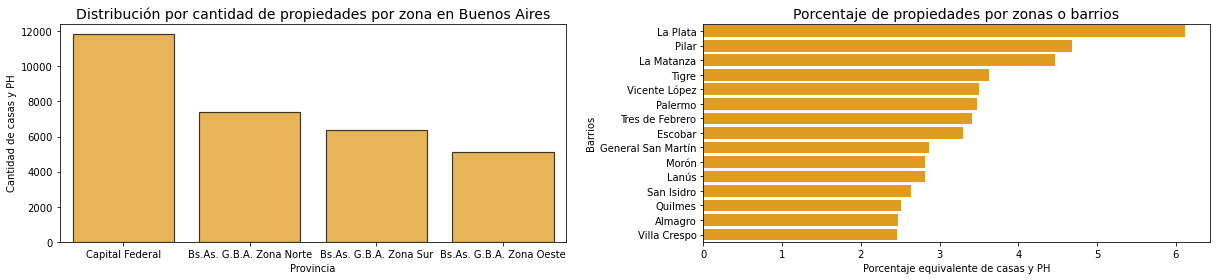

In [90]:
plt.figure(figsize = (17,4))
plt.subplot(1,2,1)
sns.countplot(x="l2", data=casa_PH, alpha = 0.75, edgecolor='black', linewidth=1.2, order=depa["l2"].value_counts().index, color='orange')
plt.title("Distribución por cantidad de propiedades por zona en Buenos Aires",fontsize=14)
plt.xlabel("Provincia",fontsize=10)
plt.ylabel("Cantidad de casas y PH",fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x="Porcentaje", y="l3", data=l32_10,color="orange")
plt.title("Porcentaje de propiedades por zonas o barrios",fontsize=14)
plt.ylabel("Barrios",fontsize=10)
plt.xlabel("Porcentaje equivalente de casas y PH",fontsize=10)
plt.tight_layout()
plt.show()

Inmediatamende se destaca en estas dos gráficas una diferencia significativa frente a las realizadas para departamentos.

En primer lugar, Capital federal a pesar de ser la provincia con mayor cantidad de propiedades nuevamente, esta vez la diferencia no es tan significativa como para obviar las otras provincias.

Segundo, Palermo y El Tigre ya no son los barrios con mayor cantidad de propiedades. Lo que indica que estas zonas a pesar de ser residenciales estan más enfocadas a departamentos. 

Tercero, el porcentaje equivalente por barrio, a la cantidad de propiedades totales es menor. Por lo tanto, la gráfica por barrios debió adaptarse para incluir más barrios para representar un porcentaje similar al de los departamentos.

* Es similar la cantidad de propiedades por años a la base de datos de departamentos?

In [91]:
casa_PH=casa_PH.copy()
casa_PH['year']=casa_PH['start_date'].dt.year

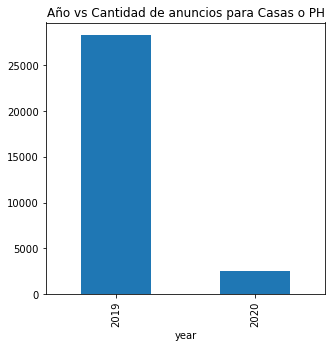

In [92]:
plt.figure(figsize=(3,3))
casa_PH.groupby('year').property_type.count().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.title('Año vs Cantidad de anuncios para Casas o PH',fontsize=12)
plt.show()

* Se eliminan las columnas irrelevantes o que tienen el mismo valor para todo el data set.

In [93]:
casa_PH.drop(columns=['index','currency'],inplace=True)

De igual forma que con la base de datos departamentos, realizamos el test de Tukey para filtrar los valores atípicos del data set.

In [94]:
tukey(casa_PH,'surface_total')

Columna analizada del Data Frame: surface_total
  Cuantil 25 o cuartil 1: 102.0
  Cuantil 75 o cuartil 3: 340.0
Test de Tukey:
  Valor límite inferior: -255.0
  Valor límite superior: 697.0


In [95]:
s_tot_22=casa_PH[casa_PH.surface_total<697]
tukey(casa_PH,'surface_covered')

Columna analizada del Data Frame: surface_covered
  Cuantil 25 o cuartil 1: 76.0
  Cuantil 75 o cuartil 3: 186.0
Test de Tukey:
  Valor límite inferior: -89.0
  Valor límite superior: 351.0


In [96]:
s_cub_22=casa_PH[casa_PH.surface_covered<351]
tukey(casa_PH,'price')

Columna analizada del Data Frame: price
  Cuantil 25 o cuartil 1: 120000.0
  Cuantil 75 o cuartil 3: 280000.0
Test de Tukey:
  Valor límite inferior: -120000.0
  Valor límite superior: 520000.0


In [97]:
price_12=casa_PH[casa_PH.price<520000]

Los valores del test de Tukey cambiaron bastante para las superficies pero muy poco en el precio, con respecto a los departamentos de la Capital Federal.

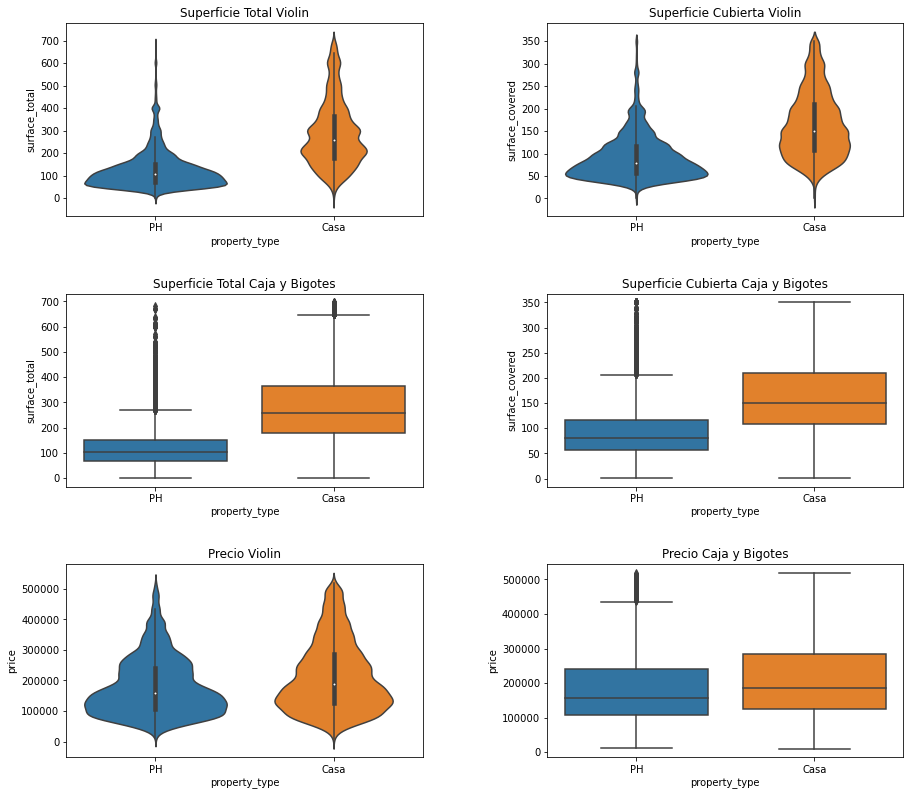

In [98]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.violinplot(data=s_tot_22,x='property_type',y='surface_total')
title = 'Superficie Total Violin'
plt.title(title);
plt.subplot(3,2,2)
sns.violinplot(data=s_cub_22,x='property_type',y='surface_covered')
title = 'Superficie Cubierta Violin'
plt.title(title);
plt.subplot(3,2,3)
sns.boxplot(data=s_tot_22,x='property_type',y='surface_total')
title = 'Superficie Total Caja y Bigotes'
plt.title(title);
plt.subplot(3,2,4)
sns.boxplot(data=s_cub_22,x='property_type',y='surface_covered')
title = 'Superficie Cubierta Caja y Bigotes'
plt.title(title);
plt.subplot(3,2,5)
sns.violinplot(data=price_12,x='property_type',y='price')
title = 'Precio Violin'
plt.title(title);
plt.subplot(3,2,6)
sns.boxplot(data=price_12,x='property_type',y='price')
title = 'Precio Caja y Bigotes'
plt.title(title);
plt.subplots_adjust(wspace=0.35,bottom=0.2,hspace=0.4)
plt.show()

Las distribuciones de superficie entre Casa y PH cambian considerablemente. Las distribuciones de PH son mas sesgadas hacia la derecha, con una pendiente más inclinada, mientras que las de las casa a pesar de ser un poco sesgadas hacia la derecha la pendiente es menos pronunciada. Lo que los PH están menos distribuidos y tienen superficies estandar, mientras las casas cubren un rango más amplio de metrajes y mayores (analizando las cajas).

Adicionalmente, las distribuciones de precios varían en una menor forma, pero se ve claramente que las casas tienen un mayor precio que los PH. 

**Un cliente puede encontrar fácilmente un PH de menor precio que una casa del mismo metraje en Properati** (Similar cantidad de datos entre casas y PH). 

In [99]:
casa_PH_2019=casa_PH[casa_PH.year==2019]
casa_PH_2019=casa_PH_2019.copy()
casa_PH_2019['month']=casa_PH_2019['start_date'].dt.month

<a href="#1"><font size="1">Volver a la tabla de contenido del desafío</font></a>

### Desafío Gráfica 2 <a id="des2"></a>

In [100]:
cyPH=casa_PH_2019[['month','property_type','price','surface_total','surface_covered']]
PH=cyPH[cyPH.property_type=='PH']
casa=cyPH[cyPH.property_type=='Casa']
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
x_values1=[2*e+0.8*1 for e in range(12)]
x_values2=[2*e+0.8*2 for e in range(12)]
plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1)
plt.bar(x_values1,PH.groupby('month').property_type.count(),color='c')
plt.bar(x_values2,casa.groupby('month').property_type.count(),color='orange')
ax.set_xticks([2*e+0.8*1.5 for e in range(12)])
ax.set_xticklabels(meses,rotation=30)
plt.title('Meses vs Cantidad de anuncios el 2019',fontsize=14)
plt.legend(['PH','Casa'],loc=0)
plt.show()

In [101]:
casa_PH_2020=casa_PH[casa_PH.year==2020]
casa_PH_2020=casa_PH_2020.copy()
casa_PH_2020['month']=casa_PH_2020['start_date'].dt.month
cyPH2=casa_PH_2020[['month','property_type']]
PH2=cyPH2[cyPH2.property_type=='PH']
casa2=cyPH2[cyPH2.property_type=='Casa']
meses2=['Enero']
x_values1=[2*e+0.8*1 for e in range(1)]
x_values2=[2*e+0.8*2 for e in range(1)]
plt.figure(figsize=(3,5))
ax = plt.subplot(1,1,1)
plt.bar(x_values1,PH2.groupby('month').property_type.count(),color='c')
plt.bar(x_values2,casa2.groupby('month').property_type.count(),color='orange')
ax.set_xticks([2*e+0.8*1.5 for e in range(1)])
ax.set_xticklabels(meses2,rotation=30)
plt.title('Meses vs Cantidad de anuncios el 2020',fontsize=14)
plt.legend(['PH','Casa'],loc=0)
plt.show()

In [102]:
casa_PH_2019.groupby('month').price.mean().mean()

235125.27601923503

In [103]:
casa_PH_2019.groupby('month').price.mean().sort_values(ascending=False)

month
5     244771.200374
2     244549.594216
3     241420.506033
4     238946.125415
10    238344.668762
6     235437.070572
9     234679.872949
1     233126.453193
8     230962.032596
12    226784.275063
11    226319.995267
7     226161.517791
Name: price, dtype: float64

In [104]:
casa_PH_2020.groupby('month').price.mean()

month
1    239995.593241
Name: price, dtype: float64

En la tabla agrupada por meses y precios se destacan los meses de Febrero a Mayo con precios por encima del promedio, y Octubre también se encuentra en este selecto grupo.

Y el mes de Julio cómo el de menor valor. Faltarían más datos de otros años para saber si la tendencia de los precios de las casas y PH es a ser menores entre Noviembre a Enero y a aumentar entre Febrero a Mayo. 

* Para analizar las otras variables numéricas se realizan diagramas de Caja y Bigotes.

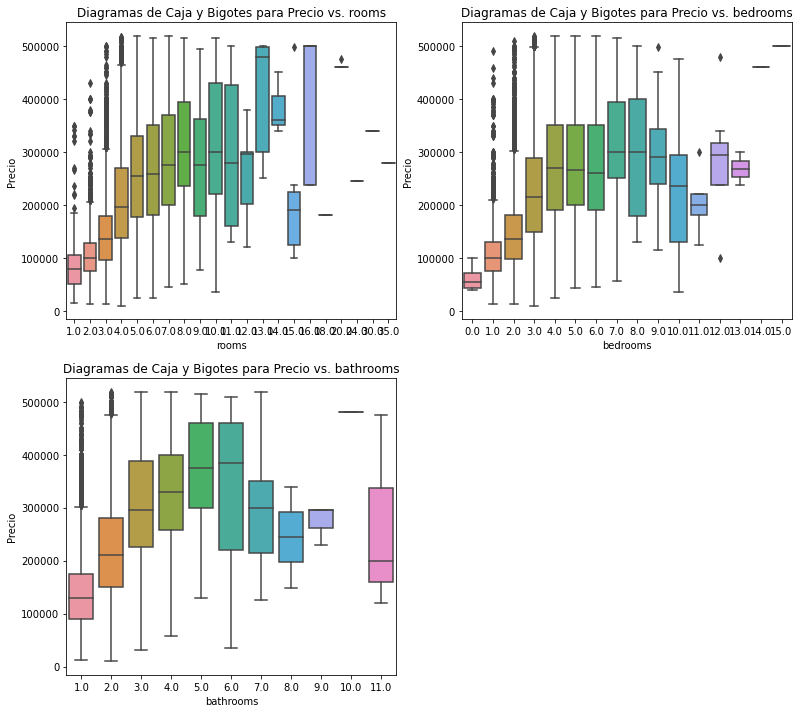

In [105]:
plt.figure(figsize=(13,12))
vars_to_plot=['rooms','bedrooms','bathrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=var,y='price',data=price_12)
    plt.ylabel("Precio")
    plt.title("Diagramas de Caja y Bigotes para Precio vs. " + var)

Se utilizará el test de Tukey para limpiar las visualizaciones de estas tres variables numéricas.

In [106]:
tukey(price_12,'rooms')
tukey(price_12,'bedrooms')
tukey(price_12,'bathrooms')

Columna analizada del Data Frame: rooms
  Cuantil 25 o cuartil 1: 3.0
  Cuantil 75 o cuartil 3: 5.0
Test de Tukey:
  Valor límite inferior: 0.0
  Valor límite superior: 8.0
Columna analizada del Data Frame: bedrooms
  Cuantil 25 o cuartil 1: 2.0
  Cuantil 75 o cuartil 3: 3.0
Test de Tukey:
  Valor límite inferior: 0.5
  Valor límite superior: 4.5
Columna analizada del Data Frame: bathrooms
  Cuantil 25 o cuartil 1: 1.0
  Cuantil 75 o cuartil 3: 2.0
Test de Tukey:
  Valor límite inferior: -0.5
  Valor límite superior: 3.5


In [107]:
rooms_cPH=price_12[price_12.rooms<=8]
bedrooms_cPH=price_12[price_12.bedrooms<=5]
bathrooms_cPH=price_12[price_12.bathrooms<=4]

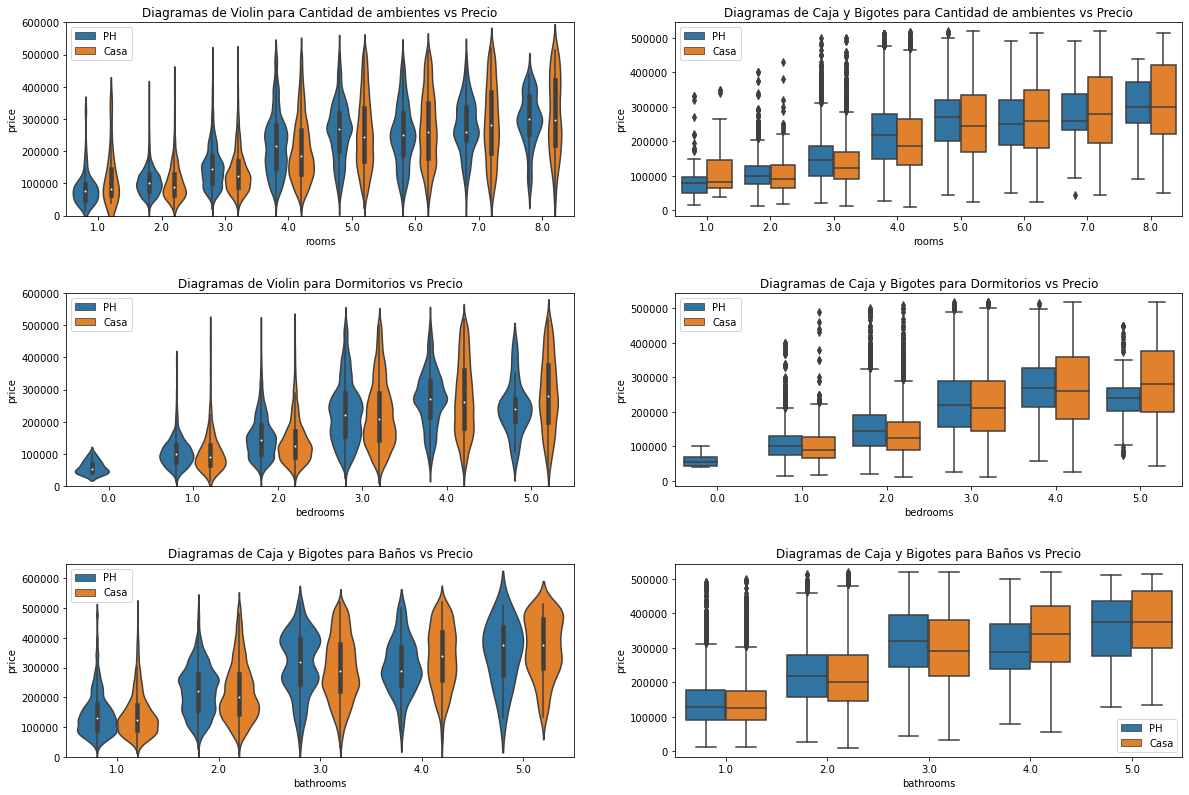

In [108]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.violinplot(data=price_12,y='price',x='rooms',hue='property_type')
plt.xlim(-0.5,7.5)
plt.ylim(0,600000)
plt.legend(loc=2)
title = 'Diagramas de Violin para Cantidad de ambientes vs Precio'
plt.title(title);
plt.subplot(3,2,2)
sns.boxplot(data=price_12,y='price',x='rooms',hue='property_type')
plt.xlim(-0.5,7.5)
plt.legend(loc=2)
title = 'Diagramas de Caja y Bigotes para Cantidad de ambientes vs Precio'
plt.title(title);
plt.subplot(3,2,3)
sns.violinplot(data=price_12,y='price',x='bedrooms',hue='property_type')
plt.xlim(-0.5,5.5)
plt.ylim(0,600000)
plt.legend(loc=2)
title = 'Diagramas de Violin para Dormitorios vs Precio'
plt.title(title);
plt.subplot(3,2,4)
sns.boxplot(data=price_12,y='price',x='bedrooms',hue='property_type')
plt.xlim(-0.5,5.5)
plt.legend(loc=2)
title = 'Diagramas de Caja y Bigotes para Dormitorios vs Precio'
plt.title(title);
plt.subplot(3,2,5)
sns.violinplot(data=price_12,y='price',x='bathrooms',hue='property_type')
plt.xlim(-0.5,4.5)
plt.ylim(0,650000)
plt.legend(loc=2)
title = 'Diagramas de Caja y Bigotes para Baños vs Precio'
plt.title(title);
plt.subplot(3,2,6)
sns.boxplot(data=price_12,y='price',x='bathrooms',hue='property_type')
plt.xlim(-0.5,4.5)
plt.legend(loc=4)
title = 'Diagramas de Caja y Bigotes para Baños vs Precio'
plt.title(title);
plt.subplots_adjust(bottom=0.2,hspace=0.4)
plt.show()

De igual forma que con los departamentos, las formas de los violines y las cajas para las distribuciones de datos de ambientes y dormitorios son muy similares, y pareciera que la variable ambiente es dormitorio más 1. Al analizarlo de esta forma ambientes y dormitorios predicen de manera similar el precio. Es un poco menor la relación descrita para casas y PH vs departamentos - seguramente se verá en la correlación. 

Para dormitorios, gracias al test de Tukey podemos analizar las distribuciones para 7 y 8 dormitorios. A diferencia de una gráfica de campana para los precios como ocurre en los departamentos, las casas y PH se incrementan a medida aumentan los baños, habitaciones y ambientes. 

* Pairplot

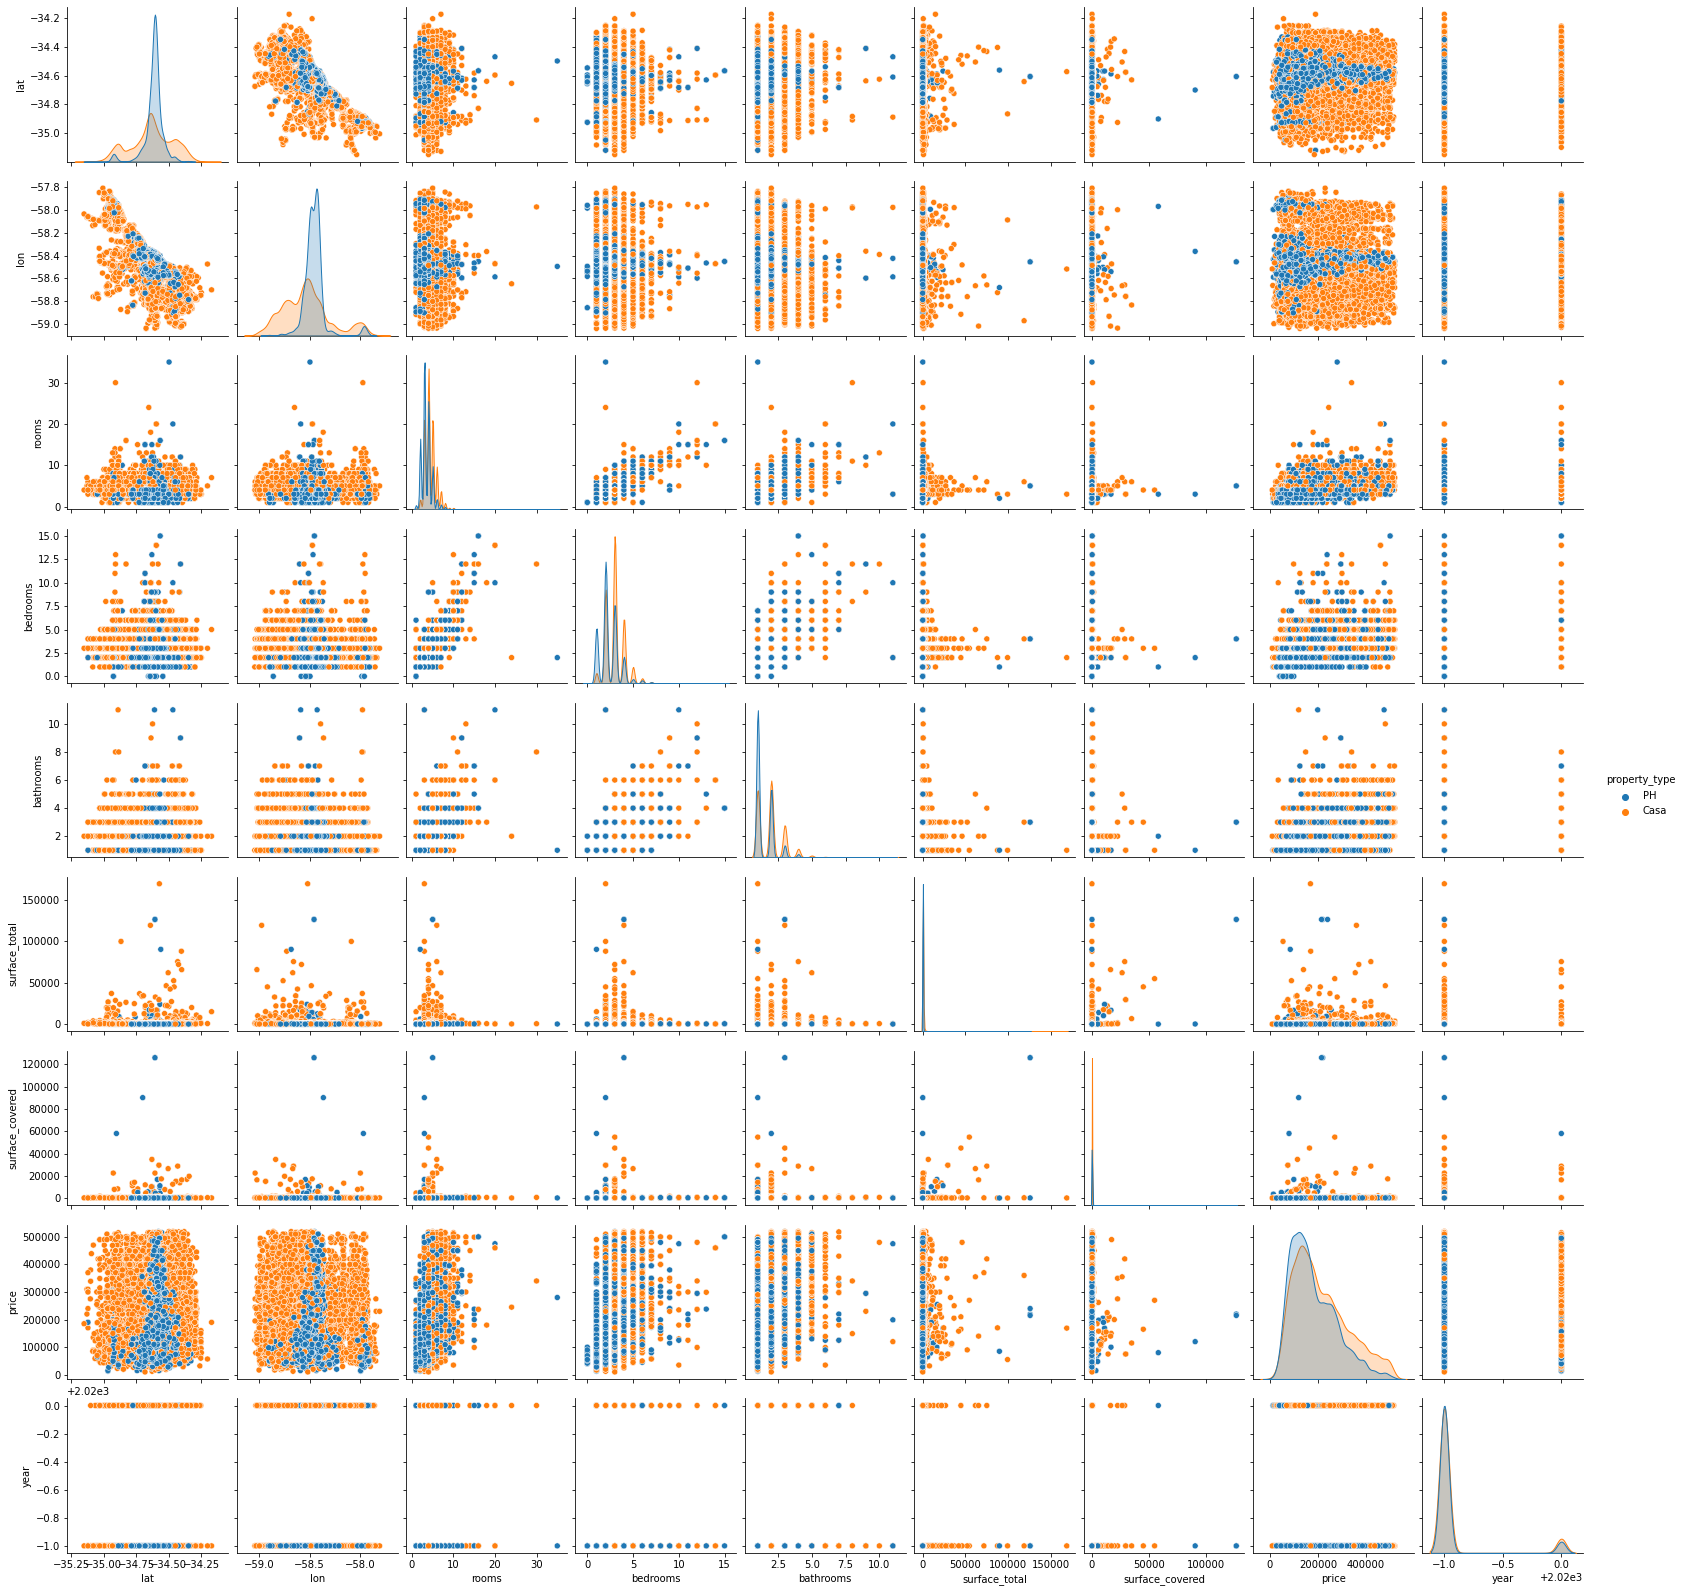

In [109]:
sns.pairplot(price_12,diag_kind='kde',hue='property_type')

Al visualizar dividiendo el data set en tipo de propiedad obtenemos información importante, principalmente en las gráfica de latitud/longitud, ya que indica una distinción entre las regiones donde más se encuentran Casas y PH. Los precios y los metrajes asociados a casas son un poco mayores que los de PH, cómo se observó en las gráficas al inicio de esta sección.  

* Correlación 

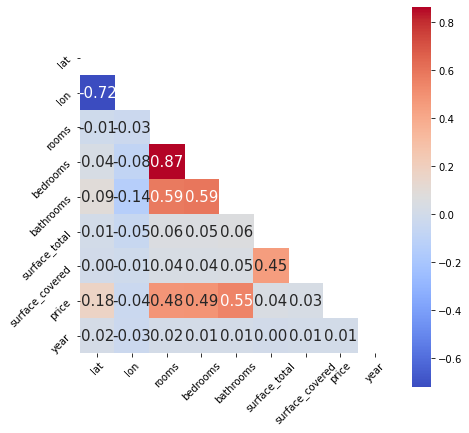

In [110]:
corr12=price_12.corr()
plt.figure(figsize=(7,7))
mask=np.zeros_like(corr12)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr12,cbar=True,square=True,annot=True,mask=mask,fmt='.2f',annot_kws={'size':15},
            xticklabels=corr12.columns,
            yticklabels=corr12.columns,
            cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [111]:
corr2_price = corr12['price']
corr2_price.sort_values(ascending=False)

price              1.000000
bathrooms          0.547482
bedrooms           0.492232
rooms              0.483388
lat                0.175357
surface_total      0.044524
surface_covered    0.030455
year               0.006374
lon               -0.035039
Name: price, dtype: float64

Se nota para casas y PH que las correlaciones entre precio y otras variables son menores que para apartamentos. Pero aplica:

Filtrando por distintas características y métodos (tipo de propiedad/ test de Tukey) se obtuvo una mayor correlación entre ambientes y dormitorios en comparación a la correlación del data set que incluía los tres tipos de propiedades con mayor número de datos (Departamentos,casas y PH). Esta correlación numérica es un representación observada en las visualizaciones que mostraban lo similar que eran las distribuciones de *rooms* y *bedrooms*. 

Adicionalmente las correlaciones de las columnas baños, dormitorios y ambientes son las más significativas para predecir el precio. Pero ya que dos de estas columnas están fuertemente relacionadas, sería necesario prescindir de una de estas para no sobre ajustar el futuro modelo.

In [112]:
price_12.shape

(28883, 17)

El último data set - price_12 se utilizaría para modelar las casas y los PH, ya que atravesó los pasos de limpieza y EDA.

<a href="#0"><font size="1">Volver al inicio</font></a>

### 2.3. Análisis Exploratorio de Datos - Restantes <a id="explore3"></a>

In [113]:
mask=lambda x: 1 if (x.property_type=='Departamento')|(x.property_type=='Casa')|(x.property_type=='PH') else 0 
properati['Big3']=properati.apply(mask,axis=1)
not_big3=properati[properati['Big3']==0]
not_big3.property_type.value_counts()

Lote               1308
Oficina             635
Otro                374
Local comercial     325
Casa de campo       314
Depósito            265
Cochera             259
Name: property_type, dtype: int64

In [114]:
not_big3.shape

(3480, 18)

Solamente 3480 filas de registros existen en el restante de propiedades de properati.

In [115]:
not_big3.isna().sum().sort_values(ascending=False)

surface_covered    2693
surface_total      1892
bathrooms          1742
lon                 333
lat                 330
property_type         0
description           0
title                 0
currency              0
price                 0
start_date            0
end_date              0
bedrooms              0
rooms                 0
l3                    0
l2                    0
created_on            0
Big3                  0
dtype: int64

Más del 75% de datos faltantes para la superficie cubierta/construída y más del 50% para superficie total. Es decir, que utilizando el método de limpieza desarrollado para las divisiones anteriores obtendremos máximo 50% de los datos.

In [116]:
not_big3 = not_big3.copy()
not_big3['surface_total']=not_big3['surface_total'].replace(np.nan, 0)
not_big3 = not_big3.copy()
not_big3['surface_covered']=not_big3['surface_covered'].replace(np.nan, 0)
fill(not_big3,'surface_total','surface_covered')
otros=not_big3[(not_big3['surface_total']>0) & (not_big3['surface_covered']>0)]
otros.shape

(1593, 18)

In [117]:
not_big3.shape[0]-otros.shape[0]

1887

1887 registros no contienen metraje de la propiedad, por ello fueron removidos.

* Cantidad de datos por tipo de propiedad

In [118]:
tipos = otros.property_type.value_counts().rename_axis('Tipos').reset_index(name='Cantidad')
tipos['Porcentaje'] = tipos.apply(lambda x: round(x['Cantidad']*100/tipos.Cantidad.sum(),2) , axis=1)
tipos

Tipos  Cantidad  Porcentaje
0             Lote       705       44.26
1          Oficina       373       23.41
2    Casa de campo       258       16.20
3             Otro       223       14.00
4  Local comercial        24        1.51
5         Depósito         8        0.50
6          Cochera         2        0.13

* Análisis de Provincias y Barrios

In [119]:
l23 = pd.DataFrame(otros.groupby(["l2"], sort = True)["l2"].count().reset_index(name="Total"))
l23.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
l23['Porcentaje']=l23.apply(lambda x: x['Total']*100/l23.Total.sum(),axis=1)
l23

l2  Total  Porcentaje
0           Capital Federal    579   36.346516
1    Bs.As. G.B.A. Zona Sur    387   24.293785
2  Bs.As. G.B.A. Zona Norte    326   20.464532
3  Bs.As. G.B.A. Zona Oeste    301   18.895166

In [120]:
l33 = pd.DataFrame(otros.groupby(["l3"], sort = True)["l3"].count().reset_index(name="Total"))
l33.sort_values(by=["Total"], ascending = False, inplace=True, ignore_index=True)
l33['Porcentaje']=l33.apply(lambda x: x['Total']*100/l33.Total.sum(),axis=1)
l33_10 = l33.drop(list(range(15,81)))
l33_10

l3  Total  Porcentaje
0                 Moreno    109    6.842436
1                  Pilar     87    5.461394
2                Escobar     83    5.210295
3               La Plata     81    5.084746
4                 Ezeiza     70    4.394225
5      General Rodríguez     55    3.452605
6             La Matanza     48    3.013183
7                  Tigre     43    2.699309
8            San Vicente     39    2.448211
9            San Nicolás     39    2.448211
10              Recoleta     37    2.322662
11           Berazategui     37    2.322662
12               Palermo     36    2.259887
13  Centro / Microcentro     35    2.197112
14               Quilmes     34    2.134338

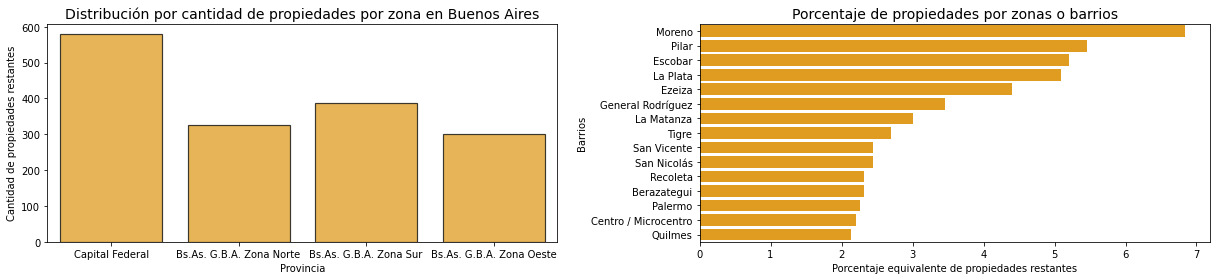

In [121]:
plt.figure(figsize = (17,4))
plt.subplot(1,2,1)
sns.countplot(x="l2", data=otros, alpha = 0.75, edgecolor='black', linewidth=1.2, order=depa["l2"].value_counts().index, color='orange')
plt.title("Distribución por cantidad de propiedades por zona en Buenos Aires",fontsize=14)
plt.xlabel("Provincia",fontsize=10)
plt.ylabel("Cantidad de propiedades restantes",fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x="Porcentaje", y="l3", data=l33_10,color="orange")
plt.title("Porcentaje de propiedades por zonas o barrios",fontsize=14)
plt.ylabel("Barrios",fontsize=10)
plt.xlabel("Porcentaje equivalente de propiedades restantes",fontsize=10)
plt.tight_layout()
plt.show()

Inmediatamende se destaca en estas dos gráficas una diferencia significativa frente a las realizadas para departamentos.

En primer lugar, Capital federal a pesar de ser la provincia con mayor cantidad de propiedades nuevamente, esta vez la diferencia no es tan significativa como para obviar las otras provincias. Y en este caso a diferencia de los departamentos, casas y PH la zona sur posee mayor cantidad de propiedades que la zona norte.

Segundo, Palermo y El Tigre ya no son los barrios con mayor cantidad de propiedades (comparando con departamentos, mientras con casas y PH, el barrio La Plata pasa del primero lugar al 4 puesto en cantidad de propiedades). Lo que indica que estos barrios estan más enfocadas a departamentos. Pilar y La Plata tienen un porcentaje considerable de cantidad de datos tanto para casas y PH como para otro tipo de propiedades. 

* Es similar la proporción de propiedades por años a la base de datos de departamentos?

In [122]:
otros=otros.copy()
otros['year']=otros['start_date'].dt.year

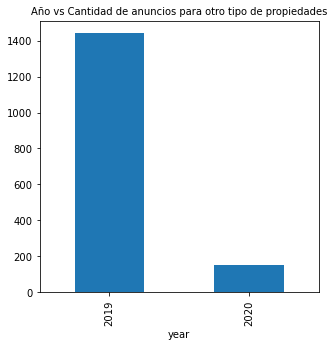

In [123]:
plt.figure(figsize=(3,3))
otros.groupby('year').property_type.count().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.title('Año vs Cantidad de anuncios para otro tipo de propiedades',fontsize=10)
plt.show()

* Se eliminan las columnas irrelevantes o que tienen el mismo valor para todo el data set.

In [124]:
otros.drop(columns=['currency'],inplace=True)

De igual forma que con la base de datos departamentos, realizamos el test de Tukey para filtrar los valores atípicos del data set.

In [125]:
tukey(otros,'surface_total')

Columna analizada del Data Frame: surface_total
  Cuantil 25 o cuartil 1: 125.0
  Cuantil 75 o cuartil 3: 1236.0
Test de Tukey:
  Valor límite inferior: -1541.5
  Valor límite superior: 2902.5


In [126]:
s_tot_32=otros[otros.surface_total<2902]
tukey(otros,'surface_covered')

Columna analizada del Data Frame: surface_covered
  Cuantil 25 o cuartil 1: 100.0
  Cuantil 75 o cuartil 3: 700.0
Test de Tukey:
  Valor límite inferior: -800.0
  Valor límite superior: 1600.0


In [127]:
s_cub_32=otros[otros.surface_covered<1600]
tukey(otros,'price')

Columna analizada del Data Frame: price
  Cuantil 25 o cuartil 1: 95000.0
  Cuantil 75 o cuartil 3: 290000.0
Test de Tukey:
  Valor límite inferior: -197500.0
  Valor límite superior: 582500.0


In [128]:
price_13=otros[otros.price<582500]

Los valores del test de Tukey cambiaron bastante para las superficies y el precio, hubo un aumento significativo, en una mayor proporción para los metrajes. Debido a que más de 40% de los datos de "otros" son de lotes y un 20% son oficinas, que normalmente poseen un gran metraje.

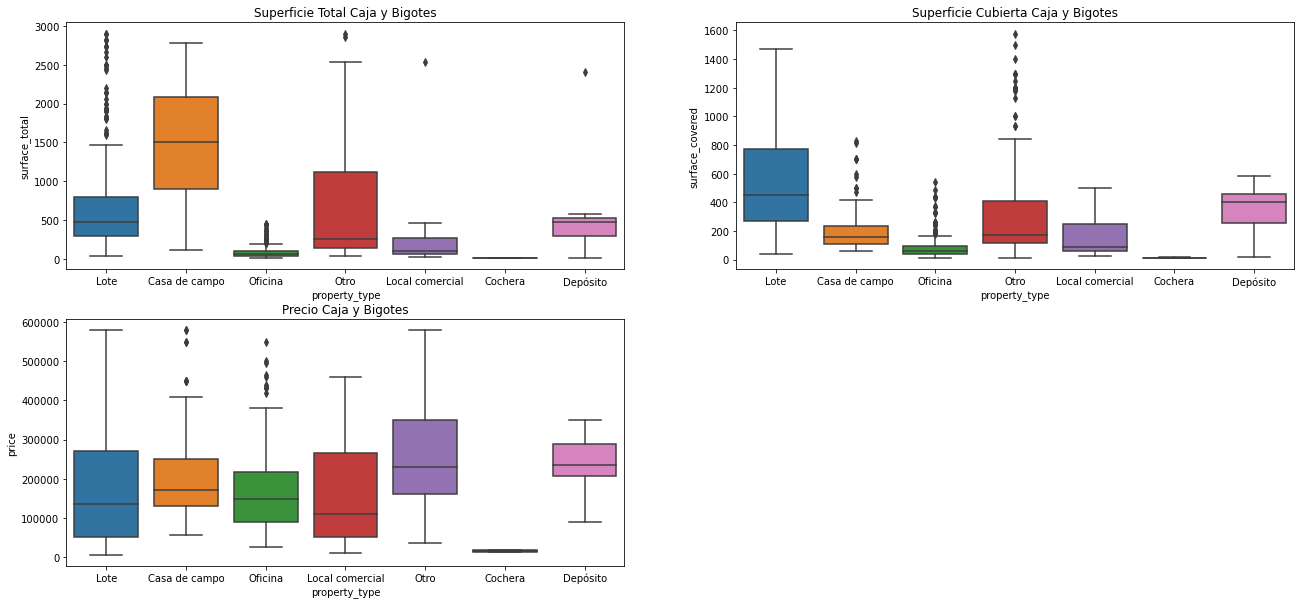

In [129]:
plt.figure(figsize=(22,10))
plt.subplot(2,2,1)
sns.boxplot(data=s_tot_32,x='property_type',y='surface_total')
title = 'Superficie Total Caja y Bigotes'
plt.title(title);
plt.subplot(2,2,2)
sns.boxplot(data=s_cub_32,x='property_type',y='surface_covered')
title = 'Superficie Cubierta Caja y Bigotes'
plt.title(title);
plt.subplot(2,2,3)
sns.boxplot(data=price_13,x='property_type',y='price')
title = 'Precio Caja y Bigotes'
plt.title(title);
plt.subplots_adjust()
plt.show()

Las distribuciones de cajas indican que las propiedades con mayor superficie total son los depositos, seguidos de las casas de campo y los lotes (lo cuál hace pensar en los depósitos más cómo bodegas gigantes para negocios de venta a por mayor que en locaciones pequeñas similares a "containers"). 

Las distribuciones de superficie total son muy diferentes a las de superficie cubierta, en donde los lotes y los depósitos tienen un mayor metraje.

Adicionalmente, las distribuciones de precios indican un mayor precio para las propiedades "otro", depósito/bodega y casa de campo. Tiene sentido al mirar los valores atípicos de metrajes en el test de Tukey tan altos, lo que representaría costos cercanos a 580k USD que incrementarían el promedio de la propiedad tipo "otro". ("otro" podría hacer referencia a terrenos extensos estatales o mansiones) 

In [130]:
price_13[price_13.property_type=='Otro'].shape

(191, 18)

Luego de filtrar, solo 191 propiedades tipo otro, entonces el peso de los valores atípicos sobre el promedio es aún mayor. Por la poca cantidad de datos, pese a haber filtrado. Seria necesaria una corrección separando cada tipo de propiedad antes de realizar el test de Tukey para lograr un mejor resultado, en caso que este tipo de propiedad fuera nuestra variable objetivo.

In [131]:
otros_2019=otros[otros.year==2019]
otros_2019=otros_2019.copy()
otros_2019['month']=otros_2019['start_date'].dt.month

<a href="#1"><font size="1">Volver a la tabla de contenido del desafío</font></a>

### Desafío Gráfica 3 <a id="des3"></a>

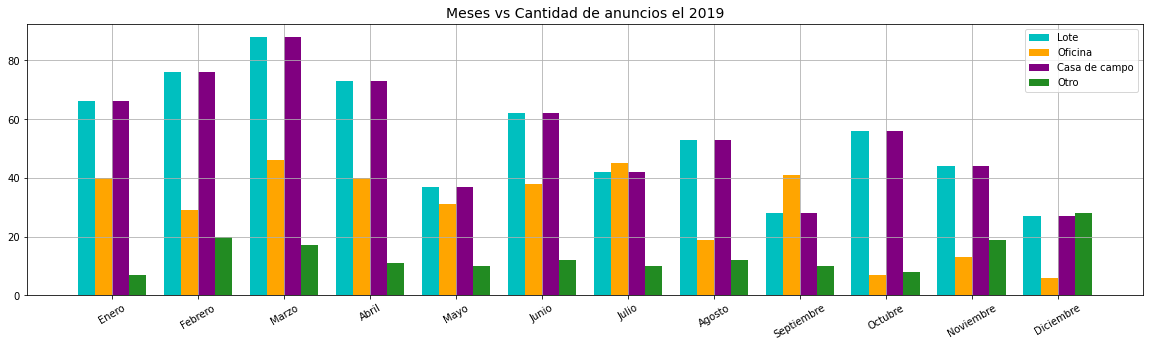

In [132]:
# locot - lote, oficina, casa de campo y otro. Las propiedades con más datos en este data set.
locot=otros_2019[['month','property_type']]
l=locot[locot.property_type=='Lote']
o=locot[locot.property_type=='Oficina']
c=locot[locot.property_type=='Casa de campo']
ot=locot[locot.property_type=='Otro']
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
x_values1=[4*e+0.8*1 for e in range(12)]
x_values2=[4*e+0.8*2 for e in range(12)]
x_values3=[4*e+0.8*3 for e in range(12)]
x_values4=[4*e+0.8*4 for e in range(12)]
plt.figure(figsize=(20,5))
ax = plt.subplot(1,1,1)
plt.bar(x_values1,l.groupby('month').property_type.count(),color='c')
plt.bar(x_values2,o.groupby('month').property_type.count(),color='orange')
plt.bar(x_values3,l.groupby('month').property_type.count(),color='purple')
plt.bar(x_values4,ot.groupby('month').property_type.count(),color='forestgreen')
ax.set_xticks([4*e+0.8*2.5 for e in range(12)])
ax.set_xticklabels(meses,rotation=30)
plt.title('Meses vs Cantidad de anuncios el 2019',fontsize=14)
plt.legend(['Lote','Oficina','Casa de campo','Otro'],loc=0)
plt.grid()
plt.show()

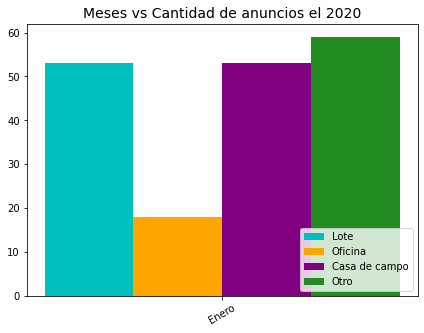

In [133]:
otros_2020=otros[otros.year==2020]
otros_2020=otros_2020.copy()
otros_2020['month']=otros_2020['start_date'].dt.month
# locot - lote, oficina, casa de campo y otro. Las propiedades con más datos en este data set.
locot=otros_2020[['month','property_type']]
l=locot[locot.property_type=='Lote']
o=locot[locot.property_type=='Oficina']
c=locot[locot.property_type=='Casa de campo']
ot=locot[locot.property_type=='Otro']
meses=['Enero']
x_values1=[4*e+0.8*1 for e in range(1)]
x_values2=[4*e+0.8*2 for e in range(1)]
x_values3=[4*e+0.8*3 for e in range(1)]
x_values4=[4*e+0.8*4 for e in range(1)]
plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
plt.bar(x_values1,l.groupby('month').property_type.count(),color='c')
plt.bar(x_values2,o.groupby('month').property_type.count(),color='orange')
plt.bar(x_values3,l.groupby('month').property_type.count(),color='purple')
plt.bar(x_values4,ot.groupby('month').property_type.count(),color='forestgreen')
ax.set_xticks([4*e+0.8*2.5 for e in range(1)])
ax.set_xticklabels(meses,rotation=30)
plt.title('Meses vs Cantidad de anuncios el 2020',fontsize=14)
plt.legend(['Lote','Oficina','Casa de campo','Otro'],loc=4)
plt.show()

In [134]:
otros_2019.groupby('month').price.mean().mean()

248634.5847889041

In [135]:
otros_2019.groupby('month').price.mean().sort_values(ascending=False)

month
10    354530.303030
12    310213.750000
8     275763.551402
5     250577.227723
11    247355.789474
2     238998.973856
7     238255.126050
3     233105.257143
4     224595.035461
1     216904.928571
9     204058.415842
6     189256.658915
Name: price, dtype: float64

In [136]:
otros_2020.groupby('month').price.mean()

month
1    294542.48366
Name: price, dtype: float64

En la tabla agrupada por meses y precios se destacan los meses de Octubre y Diciembre con precios por encima del promedio, y Agosto y Mayo también se encuentran en este selecto grupo.

Y el mes de Junio cómo el de menor valor. Faltarían más datos de otros años para saber si la tendencias menciadas aplican para otros meses.

* Para analizar las otras variables numéricas se realizan diagramas de Caja y Bigotes.

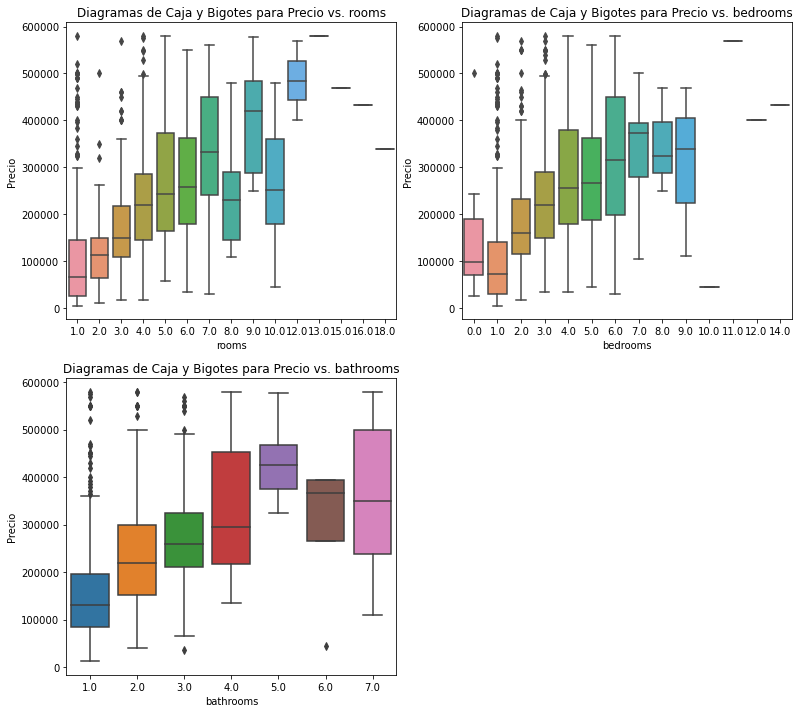

In [137]:
plt.figure(figsize=(13,12))
vars_to_plot=['rooms','bedrooms','bathrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=var,y='price',data=price_13)
    plt.ylabel("Precio")
    plt.title("Diagramas de Caja y Bigotes para Precio vs. " + var)

Se utilizará el test de Tukey para limpiar las visualizaciones de estas tres variables numéricas.

In [138]:
tukey(price_13,'rooms')
tukey(price_13,'bedrooms')
tukey(price_13,'bathrooms')

Columna analizada del Data Frame: rooms
  Cuantil 25 o cuartil 1: 1.0
  Cuantil 75 o cuartil 3: 4.0
Test de Tukey:
  Valor límite inferior: -3.5
  Valor límite superior: 8.5
Columna analizada del Data Frame: bedrooms
  Cuantil 25 o cuartil 1: 1.0
  Cuantil 75 o cuartil 3: 3.0
Test de Tukey:
  Valor límite inferior: -2.0
  Valor límite superior: 6.0
Columna analizada del Data Frame: bathrooms
  Cuantil 25 o cuartil 1: 1.0
  Cuantil 75 o cuartil 3: 2.0
Test de Tukey:
  Valor límite inferior: -0.5
  Valor límite superior: 3.5


In [139]:
price_13=price_13[(price_13.property_type=='Lote')|(price_13.property_type=='Casa de campo')|(price_13.property_type=='Oficina')]
rooms_cPH=price_13[price_13.rooms<=9]
bedrooms_cPH=price_13[price_13.bedrooms<=6]
bathrooms_cPH=price_13[price_13.bathrooms<=4]

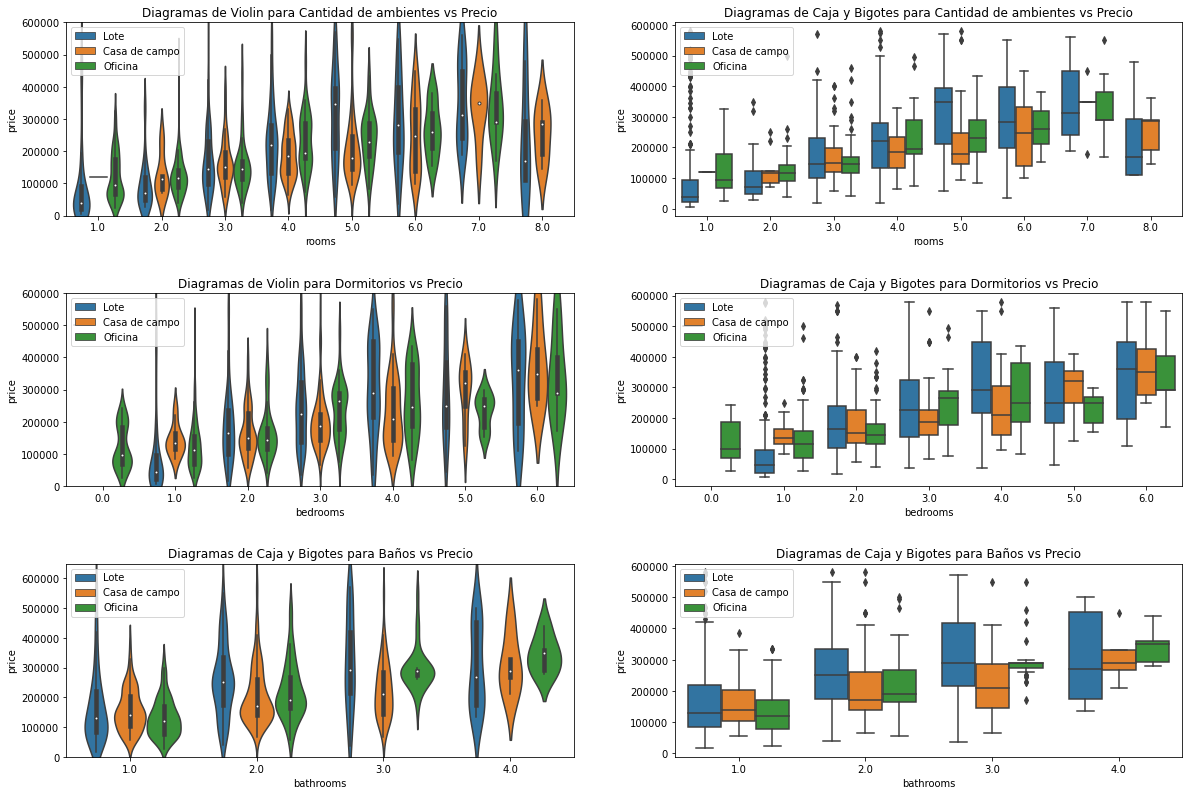

In [140]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.violinplot(data=price_13,y='price',x='rooms',hue='property_type')
plt.xlim(-0.5,7.5)
plt.ylim(0,600000)
plt.legend(loc=2)
title = 'Diagramas de Violin para Cantidad de ambientes vs Precio'
plt.title(title);
plt.subplot(3,2,2)
sns.boxplot(data=price_13,y='price',x='rooms',hue='property_type')
plt.xlim(-0.5,7.5)
plt.legend(loc=2)
title = 'Diagramas de Caja y Bigotes para Cantidad de ambientes vs Precio'
plt.title(title);
plt.subplot(3,2,3)
sns.violinplot(data=price_13,y='price',x='bedrooms',hue='property_type')
plt.xlim(-0.5,6.5)
plt.ylim(0,600000)
plt.legend(loc=2)
title = 'Diagramas de Violin para Dormitorios vs Precio'
plt.title(title);
plt.subplot(3,2,4)
sns.boxplot(data=price_13,y='price',x='bedrooms',hue='property_type')
plt.xlim(-0.5,6.5)
plt.legend(loc=2)
title = 'Diagramas de Caja y Bigotes para Dormitorios vs Precio'
plt.title(title);
plt.subplot(3,2,5)
sns.violinplot(data=price_13,y='price',x='bathrooms',hue='property_type')
plt.xlim(-0.5,3.5)
plt.ylim(0,650000)
plt.legend(loc=2)
title = 'Diagramas de Caja y Bigotes para Baños vs Precio'
plt.title(title);
plt.subplot(3,2,6)
sns.boxplot(data=price_13,y='price',x='bathrooms',hue='property_type')
plt.xlim(-0.5,3.5)
plt.legend(loc=2)
title = 'Diagramas de Caja y Bigotes para Baños vs Precio'
plt.title(title);
plt.subplots_adjust(bottom=0.2,hspace=0.4)
plt.show()

Las distribuciones de habitaciones y ambientes al igual que con departamentos, casas y PH están relacionadas, almenos desde 1 bedroom o 2 rooms hasta 4 bedrooms o 5 rooms.

El precio en promedio de los lotes alcanza un valor máximo a 5 rooms y en 3/4 bathrooms. 

* Pairplot

In [141]:
solonum=price_13[['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']]

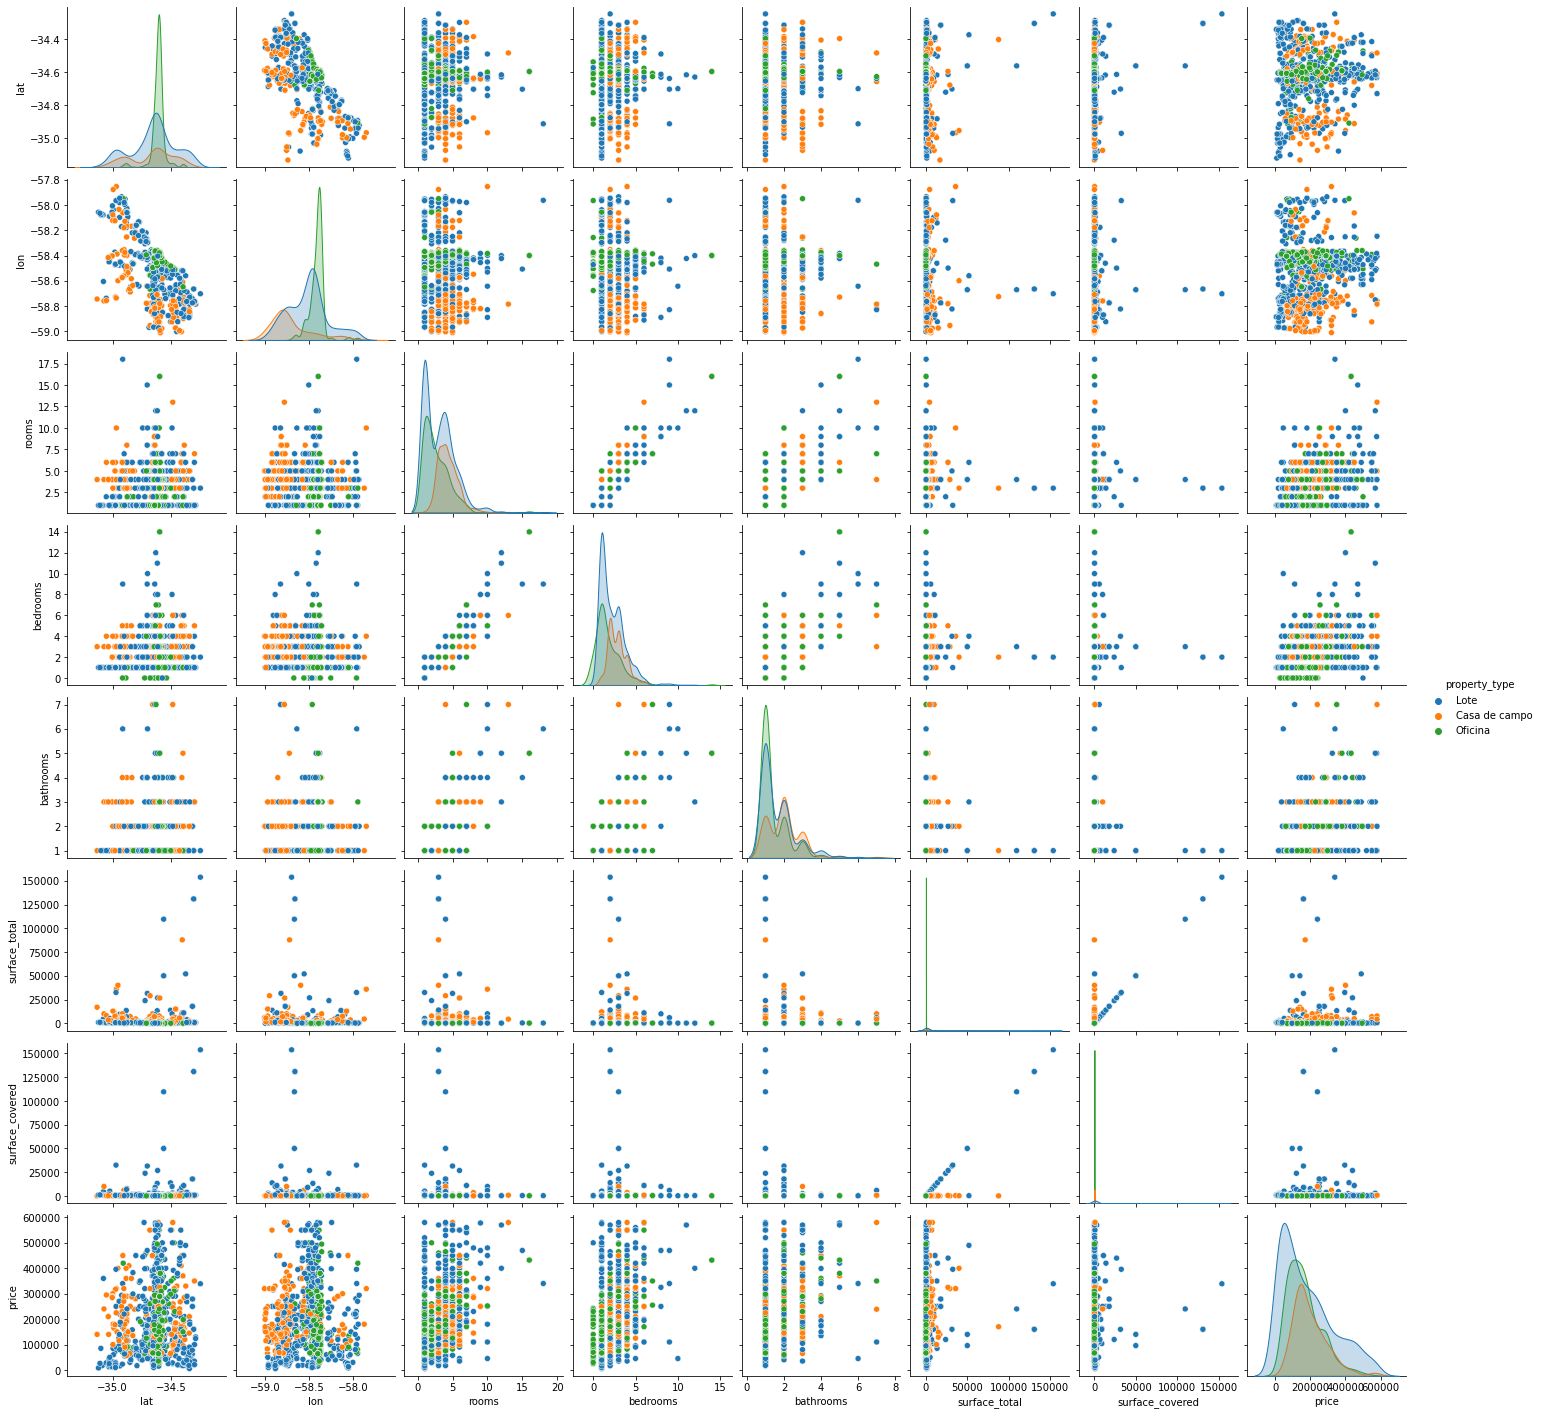

In [142]:
sns.pairplot(solonum,diag_kind='kde',hue='property_type')

Al visualizar dividiendo el data set en tipo de propiedad obtenemos información importante, principalmente en las gráfica de latitud/longitud, ya que indica una distinción entre las regiones comó se distribuyen los lotes, casas de campo y oficinas. oficinas en una zona más centralizada, mientras los otros dos tipos de propiedades están más esparcidos.

Los precios y los metrajes asociados a lotes son un poco mayores que los de oficinas y casas de campo. De hecho cada distribución cubre a la anterior, todas son sesgadas a la derecha.

* Correlación 

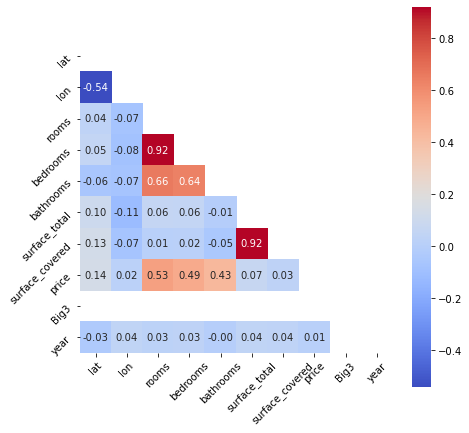

In [143]:
corr13=price_13.corr()
plt.figure(figsize=(7,7))
mask=np.zeros_like(corr13)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr13,cbar=True,square=True,annot=True,mask=mask,fmt='.2f',annot_kws={'size':10},
            xticklabels=corr13.columns,
            yticklabels=corr13.columns,
            cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [144]:
corr3_price = corr13['price']
corr3_price.sort_values(ascending=False)

price              1.000000
rooms              0.528662
bedrooms           0.487391
bathrooms          0.433070
lat                0.135596
surface_total      0.071211
surface_covered    0.032191
lon                0.019986
year               0.011969
Big3                    NaN
Name: price, dtype: float64

Se nota para lotes, casas de campo y oficinas que las correlaciones entre precio y otras variables son menores que para apartamentos. Pero aplica:

Filtrando por distintas características y métodos (tipo de propiedad/ test de Tukey) se obtuvo una mayor correlación entre ambientes y dormitorios en comparación a la correlación del data set que incluía los tres tipos de propiedades con mayor número de datos (Departamentos,casas y PH). Esta correlación numérica es un representación observada en las visualizaciones que mostraban lo similar que eran las distribuciones de *rooms* y *bedrooms*. 

Adicionalmente las correlaciones de las columnas baños, dormitorios y ambientes son las más significativas para predecir el precio. Pero ya que dos de estas columnas están fuertemente relacionadas, sería necesario prescindir de una de estas para no sobre ajustar el futuro modelo.

In [145]:
price_13.shape

(1248, 18)

Este último data set price_13 se utilizaría para modelar los lotes, oficinas y casas de campos, ya que atravesó los pasos de limpieza y EDA.

<a href="#0"><font size="1">Volver al inicio</font></a>

### 3. Desafío <a id="des"></a>

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**Una de las muchas preguntas que se respondieron en el Análisis Exploratorio de Datos (EDA) corresponde a la cantidad de anuncios por tipo de propiedad y por meses, dónde se identificó:**

# <a id='1'>Contenido del Desafío</a>

1. [El mes de mayor publicaciones de anuncios para la venta de apartamentos fue Julio](#des1)<br>

Julio, Agosto y Octubre son los meses en orden descendente con mayor cantidad de anuncios de departamentos a la venta en Properati. Teniendo Julio casi el doble de los anuncios con respecto a la mayoría de meses.

Adicionalmente, en la tabla agrupada por meses y precios para departamentos se destacan los meses de Julio a Octubre con precios por encima del promedio. Y el mes de Enero cómo el de menor valor. 

Para realizar un pronóstico mensual y/o anual faltarían más datos de otros años para saber si la tendencia de los precios de los apartamentos es "ser menores entre Noviembre a Enero y a aumentar entre Julio a Octubre". 

2. [El mes de mayor publicaciones de anuncios para la venta de casas fue Julio](#des2)<br>
3. [El mes de mayor publicaciones de anuncios para la venta de Penthouses fue Junio](#des2)<br>

Julio, Marzo y Octubre son los meses en orden descendente con mayor cantidad de anuncios de casas a la venta en Properati y por su parte, Julio, Agosto y Octubre para los penthouses (Similar a los departamentos).

In [146]:
casa.groupby('month').price.mean().mean()

275796.755656181

In [147]:
casa.groupby('month').price.mean().sort_values(ascending=False)

month
5     288531.702564
10    285240.683406
2     284244.059908
3     282605.870234
7     278505.736564
9     275600.829767
8     274444.827706
4     273962.038849
1     269517.875562
6     268853.512821
12    265555.947581
11    262497.982914
Name: price, dtype: float64

In [148]:
PH.groupby('month').price.mean().mean()

187502.8217166108

In [149]:
PH.groupby('month').price.mean().sort_values(ascending=False)

month
8     193200.657895
5     192042.273944
2     191812.661224
4     191134.612967
7     188150.840691
12    188051.647533
11    186130.262737
9     185821.866434
6     184146.717352
3     184090.785847
10    183318.943638
1     182132.590336
Name: price, dtype: float64

In [150]:
casa.surface_total.mean()-PH.surface_total.mean()

481.7802613955348

In [151]:
casa.surface_covered.mean()-PH.surface_covered.mean()

120.16920881803117

El precio promedio de las casas es mucho mayor al de los penthouses. Casi 90 mil dolares más. Lo que haría más atractivos los penthouses a pesar de tener menos metraje en promedio. 

Adicionalmente, en las tablas agrupadas por meses y precios se destacan los meses de Mayo y Octubre para las casas, con precios por encima del promedio, y Agosto y Mayo para los penthouses.  

Faltarían más datos de otros años para saber si la tendencia de los precios de las casas y PH es "ser menores entre Noviembre a Enero y a aumentar entre Febrero a Mayo".

4. [El mes de mayor publicaciones de anuncios para la venta de Lotes, Casas de campo y Oficinas fue en Marzo](#des3)<br>

Por su parte, en Diciembre las propiedades tipo "otro" tuvieron la mayoria de publicaciones. 

Adicionalmente, las distribuciones de precios indican un mayor precio para las propiedades "otro", depósito/bodega y casa de campo. Tiene sentido al mirar los valores atípicos de metrajes en el test de Tukey tan altos, lo que representaría costos cercanos a 580k USD que incrementarían el promedio de la propiedad tipo "otro". ("otro" podría hacer referencia a terrenos extensos estatales o mansiones) 

Finalmente, es importante tener en cuenta que faltan más datos para llegar a predecir un mes específico, o grupo de meses en los cuáles más propiedades salen a la venta. Y si realizaramos el mismo tratamiento de datos pero con la columna "end_date", obtendríamos otras gráficas que nos permitirían afirmar en que mes hubo más o en mes hubo menos anuncios pero nunca predecir para un siguiente año. Es decir, faltan datos de múltiples años. Por ello en el modelo de Machine Learning no se tiene en cuenta el tiempo ya que faltan más datos.

<a href="#0"><font size="1">Volver al inicio</font></a>

### 4. Machine Learning <a id="ml"></a>

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

**Normalmente los datos que pasaron anteriormente por la limpieza y EDA deberían ser utilizados para el modelamiento. Pero, en este caso se utilizará el aconsejado para facilitar la revisión del proyecto.**

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.

In [152]:
dataset = properati[(properati.property_type=='Departamento')|(properati.property_type=='Casa')|(properati.property_type=='PH')]

In [153]:
dataset = dataset[dataset.l2=='Capital Federal']

2. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.

In [154]:
dataset = dataset[(dataset.surface_total<=1000)&(dataset.surface_total>=15)]

3. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.

In [155]:
dataset = dataset[dataset.price<=4000000]

4. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.

In [156]:
dataset = dataset[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

5. Descarta aquellas instacias con valores faltantes.

In [157]:
dataset = dataset.dropna()

Data set de checkpoint

In [158]:
dataset.shape

(79627, 6)

Análisis estadístico de las variables numéricas data set final 

In [159]:
dataset.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  79627.000000  79627.000000  79627.000000   79627.000000   
mean       3.011252      2.003001      1.552476      95.315119   
std        1.311714      1.051486      0.850633      77.064141   
min        1.000000      0.000000      1.000000      15.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000    1000.000000   

       surface_covered         price  
count     79627.000000  7.962700e+04  
mean         84.955091  2.629007e+05  
std         157.251990  2.945953e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.250000e+05  
50%          63.000000  1.800000e+05  
75%          96.000000  2.800000e+05  
max       17220.000000  4.000000e+06

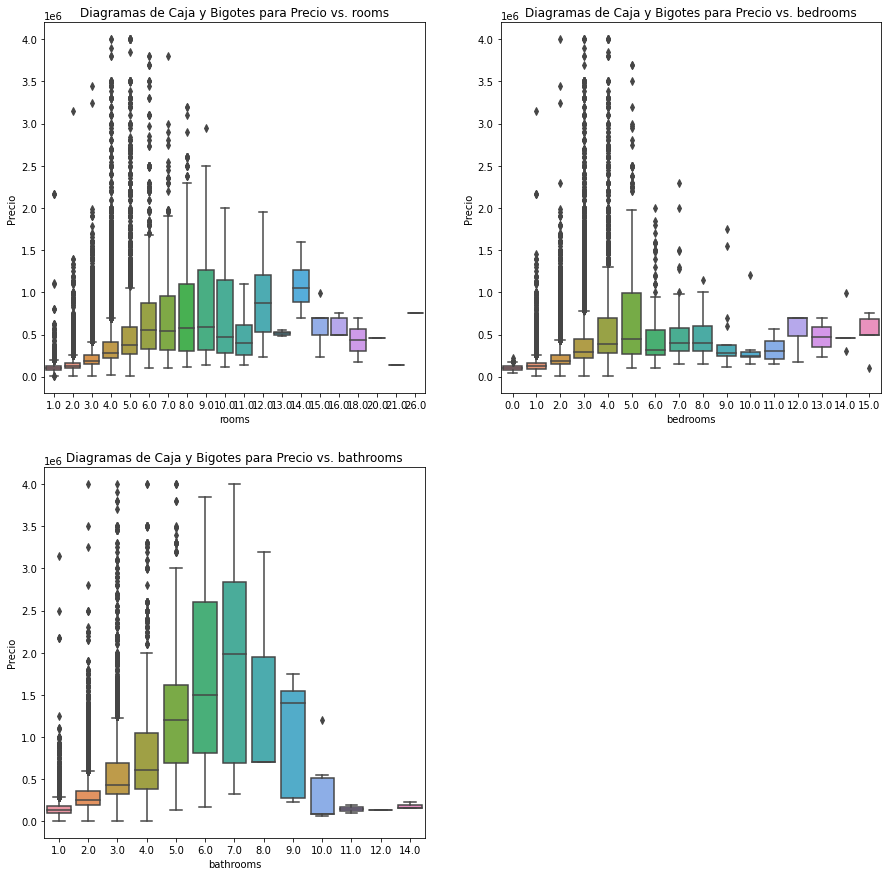

In [160]:
plt.figure(figsize=(15,15))
vars_to_plot=['rooms','bedrooms','bathrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=var,y='price',data=dataset)
    plt.ylabel("Precio")
    plt.title("Diagramas de Caja y Bigotes para Precio vs. " + var)

En los diagramas se muestra que la preparación del data set no fue la más efectiva ya que se nota una gran presencia de valores atípicos, se incluyen valores muy grandes de habitaciones y baños que en el EDA de departamentos, casas y PH fueron determinados para ser filtrados. 

Desarrollando el proyecto me di cuenta de cómo conocer la cantidad de outliers para el data set.

In [161]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [162]:
num_cols = [col for col in dataset.columns if dataset[col].dtypes != 'O' and col not in "Id"]

In [163]:
has_outliers(dataset, num_cols)

rooms : 627
bedrooms : 261
bathrooms : 2818
surface_total : 5901
surface_covered : 5814
price : 6894


['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

Precio, Superficie total y cubierta tiene muchísimos datos atípicos lo que indica una mala filtración del data set.

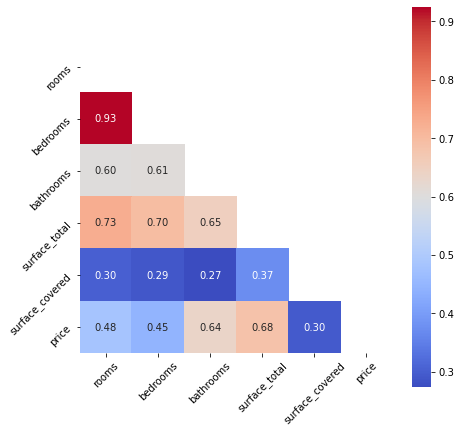

In [164]:
corre=dataset.corr()
plt.figure(figsize=(7,7))
mask=np.zeros_like(corre)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corre,cbar=True,square=True,annot=True,mask=mask,fmt='.2f',annot_kws={'size':10},
            xticklabels=corre.columns,
            yticklabels=corre.columns,
            cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [165]:
corre_price = corre['price']
corre_price.sort_values(ascending=False)

price              1.000000
surface_total      0.683771
bathrooms          0.637209
rooms              0.483810
bedrooms           0.445273
surface_covered    0.295290
Name: price, dtype: float64

0.93 es una correlación bastante alta, entonces yo prescindiría de bedrooms o rooms al realizar el modelo. Ya que una variable define la otra, seria como entrenar con duplicados.

Adicionalmente, surface_total, bathrooms y rooms son las características más cercanas a predecir el precio.

* Cargue de librerías y elección de métrica:

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

La métrica de evalución de los modelos será el coeficiente de determinación o **R-Squared**(R²), ya que es una medición estadística que representa la proporción de la varianza hacia una variable dependiente (en este caso el precio de los inmuebles) que es explicada por la dependencia a variables independientes en un modelo de regresión. En este caso las variables independientes son el número de baños, número de habitaciones, superficie total, etc.

Los valores de R² van entre 0 y 1. Entre más cercano a 1 indica que las predicciones de la regresión se ajusta perfectamente a los datos (buscamos que el modelo se acerque a 1 lo mayormente posible). La ecuación general que define está métrica es:

$ R^2 = 1 - Varianza Inexplicada / Varianza Total $

**Nota:** Es importante añadir que otras métricas como Mean Squared prediction Error (MSEP) o Mean Squared Absolute Error (MSAE) se pueden utilizar para evaluar el modelo y en este caso optimizar el modelo implica en encontrar los párametros e hiperparámetros en los que el modelo tenga un menor error.

* Preparación de datos para modelar y **Modelo Benchmark** (Modelo sencillo para comparar con Árboles y KNN)

Se realizará una regresión lineal, es decir, de solo dos variables, en donde se utilizará la superficie total para predecir el precio del inmueble:

In [196]:
X=dataset['surface_total'].values.reshape(-1,1)
y=dataset.price
print(X.shape)
print(y.shape)

(79627, 1)
(79627,)


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [198]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [199]:
r2_train=r2_score(y_train, y_train_pred)
r2_test=r2_score(y_test, y_test_pred)
print("Coeficiente de determinación para los datos datos de entrenamiento:", round(r2_train, 2))
print("Coeficiente de determinación para los datos datos de prueba:", round(r2_test, 2))

Coeficiente de determinación para los datos datos de entrenamiento: 0.47
Coeficiente de determinación para los datos datos de prueba: 0.47


0.47 es un coeficiente bastante bajo que nos permitiría predecir menos de la mitad de los precios de los inmuebles. Se espera que los otros modelos obtengan un coeficiente de determinación mayor.

* Creamos las variables X y y. Para los otros modelos:

In [167]:
X=dataset[['rooms','bathrooms','surface_total','surface_covered']].values
y=dataset.price

In [168]:
X

array([[  7.,   2., 140., 140.],
       [  2.,   2.,  70.,  58.],
       [  2.,   1.,  45.,  45.],
       ...,
       [  4.,   2., 317., 143.],
       [  3.,   2., 145., 145.],
       [  4.,   5., 220., 210.]])

In [169]:
y

0          153000.0
1          159000.0
2          125000.0
3          295000.0
5          150000.0
            ...    
146554     570000.0
146555     480000.0
146556     530000.0
146557     420000.0
146558    1470000.0
Name: price, Length: 79627, dtype: float64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<a href="#0"><font size="1">Volver al inicio</font></a>

### 4.1. Vecinos Cercanos <a id="ml1"></a>

In [171]:
scores_train = []
scores_test = []
for k in range(1, 20):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train,y_train)
    y_train_pred = knn_reg.predict(X_train)
    y_test_pred = knn_reg.predict(X_test)
    scores_train.append(r2_score(y_train, y_train_pred))
    scores_test.append(r2_score(y_test, y_test_pred))

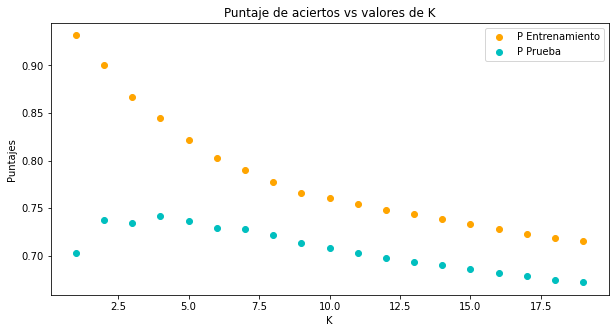

In [172]:
plt.figure(figsize=(10,5))
plt.title('Puntaje de aciertos vs valores de K') 
plt.xlabel('K')
plt.ylabel('Puntajes')
plt.scatter(range(1,20), scores_train,color='orange')
plt.scatter(range(1,20), scores_test,color='c')
plt.legend(['P Entrenamiento','P Prueba'],loc=0)
plt.show()

Con surface_covered:
Se elige n=2 ya que es el valor óptimo para el R² de prueba y genera también un buen valor de entrenamiento.
Sin surface_covered:
Se elige n=4 ya que es el valor óptimo para el R² de prueba y genera también un buen valor de entrenamiento.

In [173]:
knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg.fit(X_train,y_train)
y_train_pred = knn_reg.predict(X_train)
y_test_pred = knn_reg.predict(X_test)
score_train_knn = r2_score(y_train, y_train_pred)
score_test_knn = r2_score(y_test, y_test_pred)

In [174]:
print(round(score_train_knn,4))
print(round(score_test_knn,4))

0.9002
0.7375


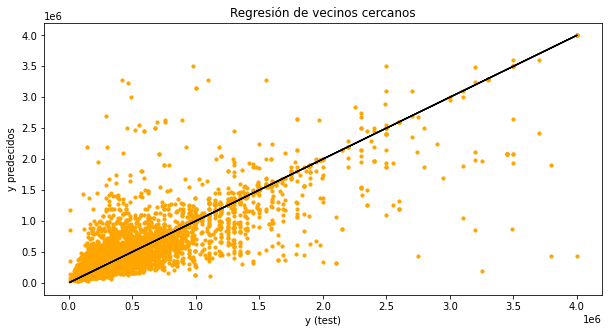

In [175]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
plt.title('Regresión de vecinos cercanos') 
plt.xlabel('y (test)')
plt.ylabel('y predecidos')
ax.scatter(y_test,y_test_pred,c='orange',s=10)
ax.plot(y_test, y_test,c='black')
plt.show()

Los R² de entrenamiento 90.52% y prueba 74.79% para rooms,bathrooms, surface_total y surface_covered. Se quitará covered, ya que el análisis de las correlaciones determino que no es tan buena característica. 
Los R² de entrenamiento 77.7% y prueba 68.07% para rooms,bathrooms y surface_total. 
Esto quiere decir que a pesar de tener una correlación baja, 1:1 entre superficie cubierta y precio, se desempeña mejor el modelo utilizando está característica.

<a href="#0"><font size="1">Volver al inicio</font></a>

### 4.2. Árboles de decisiones <a id="ml2"></a>

In [176]:
scores_train_tree = []
scores_test_tree = []
for k in range(2, 20):
    tree_reg = DecisionTreeRegressor(max_depth=k, random_state=42)
    tree_reg.fit(X_train,y_train)
    y_train_pred = tree_reg.predict(X_train)
    y_test_pred = tree_reg.predict(X_test)
    scores_train_tree.append(r2_score(y_train, y_train_pred))
    scores_test_tree.append(r2_score(y_test, y_test_pred))

In [177]:
plt.figure(figsize=(10,5))
plt.title('Puntaje de aciertos vs ramas o profundidad') 
plt.xlabel('Max Depth')
plt.ylabel('Puntajes')
plt.scatter(range(2,20), scores_train_tree,color='orange')
plt.scatter(range(2,20), scores_test_tree,color='c')
plt.legend(['P Entrenamiento','P Prueba'],loc=0)
plt.grid()
plt.show()

In [178]:
df=pd.DataFrame({'max_depth':range(2,20),'scores':scores_test_tree})

In [179]:
df['Perc']=round(df.scores*100,2)
df

max_depth    scores   Perc
0           2  0.521115  52.11
1           3  0.581786  58.18
2           4  0.627807  62.78
3           5  0.656965  65.70
4           6  0.678999  67.90
5           7  0.703014  70.30
6           8  0.711048  71.10
7           9  0.729347  72.93
8          10  0.740475  74.05
9          11  0.752107  75.21
10         12  0.763325  76.33
11         13  0.775321  77.53
12         14  0.765560  76.56
13         15  0.767741  76.77
14         16  0.771552  77.16
15         17  0.772390  77.24
16         18  0.774607  77.46
17         19  0.775135  77.51

A pesar de que el mejor R² se da para max depth 15, se elige max depth 12. Ya que tiene menor sobre ajuste (overfitting) en el entrenamiento, un buen coeficiente de determinación y menos ramas, lo que indica que trabajaría mejor con nuevos datos de validación.

In [180]:
tree_reg = DecisionTreeRegressor(max_depth=12, random_state=42)
tree_reg.fit(X_train,y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)
score_train_tree = r2_score(y_train, y_train_pred)
score_test_tree = r2_score(y_test, y_test_pred)

In [181]:
print(round(score_train_tree*100,2))
print(round(score_test_tree*100,2))

87.51
76.33


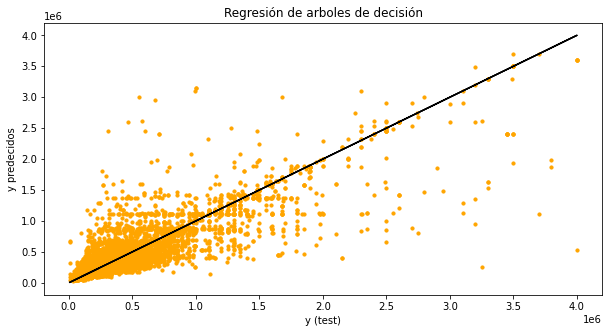

In [182]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
plt.title('Regresión de arboles de decisión') 
plt.xlabel('y (test)')
plt.ylabel('y predecidos')
ax.scatter(y_test,y_test_pred,c='orange',s=10)
ax.plot(y_test, y_test,c='black')
plt.show()

<a href="#0"><font size="1">Volver al inicio</font></a>

### 5. Conclusiones <a id="con"></a>

* Entre los modelos entrenados, ¿Cuál elegirías para utilizar?¿Por qué? 

Eligiría vecinos más cercanos, ya que se desempeña bastante bien llegando casi a 75% (Valor máximo de R² para KNN y se obtiene con 4 vecinos). Mientras que árboles de decisión para llegar a este valor requiere 12 ramas y hasta 15 ramas, si se quiere utilizar el valor de mayor R².

* Ser **crítico** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Afortunadamente, se analizó fuertemente la base de datos y se removió bedrooms del benchmark, ya que al estar tan correlacionada está columna con rooms hubiese sido malo entrenar el modelo con datos que son tan ligados entre sí. 

Para ayudar al modelo, ayudaría tener más datos de otros años, ya que practicamente todo el datset es del 2019, de está forma se pueden incluir más columnas relacionadas al tiempo de creación y baja de los anuncios. Adicionalmente, se debe filtrar de mejor forma, ya que al dataset utilizado para modelar se le debió:

Remover duplicados, tratar de llenar valores faltantes antes de eliminarlos, remover valores atípicos y en dado caso realizar un modelo para solo los departamentos ya que eran la mayoría de los datos y en el EDA se mostró la importancia de separar estas propiedades de Casas y PH.